# Case Passei Direto
## Raphael Reis Coelho
## Vaga: Cientista de Dados

Primeiramente, começamos importando as bibliotecas que usaremos e então abrimos todas as bases. Ao todo temos 9 bases:

- students.json - Amostra de usuários que acessaram o Passei Direto no mês de Novembro de 2017. Todos os outros datasets referenciam esses usuários
- sessions.json - Todas as sessões dos usuários ao longo do tempo
- subjects.json - Disciplinas seguidas pelos usuários
- questions.json - Perguntas feitas pelos usuários
- answers.json - Respostas à perguntas feitas pelos usuários
- fileViews.json - Arquivos visualizados pelos usuários
- premium_student.json - Estudantes premiums
- premium_payments.json - Pagamentos realizados pelos usuários que assinaram o Plano Premium do Passei Direto
- premium_cancellations.json - Pedidos de cancelamento do Plano Premium solicitados pelos usuários pagante

In [15]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [16]:
data = json.load(open('students.json', encoding='utf-8'))

students = pd.DataFrame(data)

students = students.rename(columns={'Id':'StudentId'})

students.head()


,City,CourseName,StudentId,RegisteredDate,SignupSource,State,StudentClient,UniversityName
0,NaN,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,NaN,PUC-RIO
1,Rio de Janeiro,Direito do Trabalho e Segurança Social,59873654,2012-09-03 20:32:04.853000,Facebook,Rio de Janeiro,NaN,UFF
2,NaN,Enfermagem,3664695,2012-09-10 20:26:30.253000,Facebook,Distrito Federal,NaN,UNB
3,Resende,Engenharia de Produção Mecânica,15207697,2012-09-05 15:31:08.090000,Facebook,Rio de Janeiro,NaN,UERJ
4,NaN,Engenharia Elétrica,36988693,2012-10-15 21:34:51.143000,Facebook,NaN,NaN,UFU


In [17]:
#Todas as sessões dos usuários ao longo do tempo
data = json.load(open('sessions.json'))

sessions = pd.DataFrame(data)

del sessions['StudentClient']

sessions.head()


,SessionStartTime,StudentId
0,2017-02-20 14:51:37,12970655
1,2017-02-22 14:04:34,12970655
2,2017-02-23 13:46:14,12970655
3,2017-02-23 14:52:24,12970655
4,2017-03-03 20:47:21,12970655


In [18]:
#Disciplinas seguidas pelos usuários
data = json.load(open('subjects.json', encoding='utf-8'))

subjects = pd.DataFrame(data)

subjects.head()


,FollowDate,StudentId,SubjectName
0,2015-09-12 16:00:11.000000,12970655,Disciplina Integradora II
1,2015-09-12 16:00:11.000000,12970655,Pesquisa Operacional
2,2016-06-07 17:07:35.000000,12970655,Cálculo I
3,2015-09-12 16:00:11.000000,12970655,Introdução à Administração
4,2015-09-12 16:00:11.000000,12970655,Contabilidade Aplicada à Administração


In [19]:
#Perguntas feitas pelos usuários
data = json.load(open('questions.json', encoding='utf-8'))

questions = pd.DataFrame(data)

del questions['StudentClient']

questions.head()


,QuestionDate,QuestionSnippet,StudentId
0,2013-09-04 14:09:25.963000,O que é mais importante para um projeto: escop...,12970655
1,2013-09-04 15:36:51.083000,Você pode ter um negócio/produto bem sucedido ...,12970655
2,2013-10-30 19:41:43.137000,Custos com consultoria para planejar um projet...,12970655
3,2013-10-30 19:19:15.517000,CAPEX: investimento em consultoria entra como ...,12970655
4,2013-10-30 19:38:06.420000,Custos com consultoria para planejar um projet...,12970655


In [20]:
#Respostas à perguntas feitas pelos usuários
data = json.load(open('answers.json', encoding='utf-8'))

answers = pd.DataFrame(data)

del answers['StudentClient']

answers.head()


,AnswerDate,AnswerSnippet,StudentId
0,2013-08-30 12:27:57.190000,"<p>Vou tentar <span style=""text-decoration: un...",12970655
1,2013-09-04 14:03:18.240000,<p>O <strong>centil</strong> divide algo em 10...,12970655
2,2013-09-05 13:20:09.513000,<p>Ou ser&aacute; que o problema que esses pro...,12970655
3,2013-09-04 19:01:56.357000,<p>Excelente pergunta! Abaixo est&atilde;o as ...,12970655
4,2013-11-12 00:06:05.200000,<p>Vamos supor que voc&ecirc; se compromete a ...,12970655


In [21]:
#Arquivos visualizados pelos usuários
data = json.load(open('fileViews.json', encoding='utf-8'))

fileViews = pd.DataFrame(data)

del fileViews['Studentclient']

fileViews.head()


,FileName,StudentId,ViewDate
0,Exercicios Resolvidos do Halliday sobre Rotaçã...,12970655,2017-02-23 10:46:03.047000
1,Exercicios Resolvidos do Halliday sobre Rotaçã...,12970655,2017-02-23 10:46:12.370000
2,CALCULO I,12970655,2017-05-25 22:39:48.000000
3,CALCULO I,12970655,2017-05-25 22:40:36.000000
4,CALCULO I,12970655,2017-05-25 22:43:16.000000


In [22]:
#Base dos usuários que são premium
data = json.load(open('premium_students.json'))

premium_students = pd.DataFrame(data)

del premium_students['RegisteredDate']

premium_students.head()

,StudentId,SubscriptionDate
0,98723802,2017-11-01 01:20:11.000000
1,86905029,2017-11-17 21:58:57.163663
2,40935842,2017-11-01 01:26:17.114303
3,83184096,2018-05-18 14:08:42.000000
4,12771137,2017-11-01 00:59:44.849137


In [23]:
#Pagamentos realizados pelos usuários que assinaram o Plano Premium do Passei Direto
data = json.load(open('premium_payments.json'))

premium_payments = pd.DataFrame(data)

premium_payments.head()

,PaymentDate,PlanType,StudentId
0,2017-05-26 22:25:03.000000,Anual,12970655
1,2018-05-26 10:05:28.000000,Anual,12970655
2,2016-07-21 19:57:57.717000,Mensal,12970655
3,2016-08-21 08:47:42.947000,Mensal,12970655
4,2016-09-21 08:54:06.270000,Mensal,12970655


In [24]:
#Pedidos de cancelamento do Plano Premium solicitados pelos usuários pagantes
data = json.load(open('premium_cancellations.json'))

premium_cancellations = pd.DataFrame(data)

premium_cancellations.head()

,CancellationDate,StudentId
0,2016-05-05 19:08:31.937000,34129668
1,2016-05-05 22:48:20.830000,34129668
2,2016-05-20 22:37:21.117000,82394932
3,2016-05-31 13:44:55.307000,82942835
4,2016-06-01 14:22:19.467000,85382416


Aqui criamos uma função para fazer alguns gráficos que serão necessários. Infelizmente não vamos conseguir usa-lá em todos mas já nos ajuda a diminuir um pouco a quantidade de código usada. A função receberá um eixo x, um eixo y, um input agrupador, o label de cada eixo e o titulo do gráfico 

In [138]:
def make_plot(x, y, hue, label_x, label_y, title):
    sns.set_context("paper", font_scale=2)
    sns.set_style('ticks')
    sns.catplot(x=x, y=y, 
                palette = "viridis",
                hue=hue,
                ci = None,
                data=dataset_count, 
                height=8.27, 
                aspect=20/10,
                kind='bar')
    plt.xlabel(label_x, fontsize=20)
    plt.ylabel(label_y, fontsize=20)
    plt.title(title, fontsize=20)
    plt.show()

##### Questão 1: Faça uma análise comparativa do comportamento dos usuários não Premium e dos usuários Premium. Que tipos de ações podemos direcionar para usuários não Premium fazerem com o objetivo de termos um maior número de assinantes?

##### How to Solve: 

##### - Analisar o número de sessões

##### - Analisar o número de perguntas e respostas

##### - Analisar a quantidade de disciplinas

##### - Analisar o curso

##### - Analisar o estado

##### - Analisar o StudentClient

##### - Analisar o Signup Source



Por restrições da máquina usada para a realização desse teste, não foi possível criar um grande dataframe com todas as bases. Foi necessário criar, para cada análise, um pequeno dataset envolvendo as variáveis que seriam usadas.

Para a primeira análise, vamos juntar as seguintes bases:

- students

- premium_students

- premium_payments

- premium_cancellations

O objetivo era entender quantos alunos eram premiums e quantos não eram. Para isso faremos as seguintes manipulações:

- Merge com todas as bases necessárias

- Retiramos as duplicatas pois cada aluno só pode aparecer uma vez para termos um conta 
precisa.

- Preenchemos todos os valores NaN com 0

- Criamos uma coluna chamada 'IsPremium'. Uma Flag para que possamos dizer claramente quem é premium e quem não é. Demos o valor 'Premium' para todas as linhas e em seguida fazemos a verificação:

- Se o StudentId em questão não tiver um tipo de plano, nem uma data de inscrição e nem um data de cancelamento, então o aluno não é Premium.

Por que isso é necessário?


Foi observado que as bases não conversam umas com as outras perfeitamente. Ou seja, há StudentId's que existem na base de payment, mas não existem na base de cancelamento. Há StudentId's que existem na base de cancelamento, mas não existem na base de premium, e assim por diante. Logo, assumimos que se um estudante tivesse alguma dessas informações, então ele seria premium. este pensamento será reutilizado nas próximas análises e será chamado de 'método analítico'. Por fim, simplesmente contamos a quantidade de Ids que são premiums e os que não são.

In [139]:
dataset = pd.merge(students, premium_students, how='outer',on='StudentId')
dataset = pd.merge(dataset, premium_payments, how='outer',on='StudentId')
dataset = pd.merge(dataset, premium_cancellations, how='outer',on='StudentId')
dataset.drop_duplicates(subset = 'StudentId', keep=False,inplace=True)

dataset = dataset.fillna(0)
dataset['isPremium'] = 'Premium'
dataset['isPremium'].loc[(dataset['PlanType'] == 0) & 
                         (dataset['SubscriptionDate'] == 0) & 
                         (dataset['CancellationDate'] == 0)]= 'Not Premium'
dataset.head()

,City,CourseName,StudentId,RegisteredDate,SignupSource,State,StudentClient,UniversityName,SubscriptionDate,PaymentDate,PlanType,CancellationDate,isPremium
20,Rio de Janeiro,Direito do Trabalho e Segurança Social,59873654,2012-09-03 20:32:04.853000,Facebook,Rio de Janeiro,0,UFF,0,0,0,0,Not Premium
21,0,Enfermagem,3664695,2012-09-10 20:26:30.253000,Facebook,Distrito Federal,0,UNB,0,0,0,0,Not Premium
22,Resende,Engenharia de Produção Mecânica,15207697,2012-09-05 15:31:08.090000,Facebook,Rio de Janeiro,0,UERJ,0,0,0,0,Not Premium
23,0,Engenharia Elétrica,36988693,2012-10-15 21:34:51.143000,Facebook,0,0,UFU,0,0,0,0,Not Premium
24,0,Química,1001195,2012-10-15 21:35:05.540000,Facebook,Espirito Santo,0,UFES,0,0,0,0,Not Premium


Logo, vemos uma grande disparidade na base onde o numéro de premiums é pouco mais de 10% de todos os estudantes. Isso será importante pois teremos que fazer todas as análises por proporção.

In [140]:
dataset['isPremium'].value_counts().to_frame().reset_index()

,index,isPremium
0,Not Premium,57971
1,Premium,6978


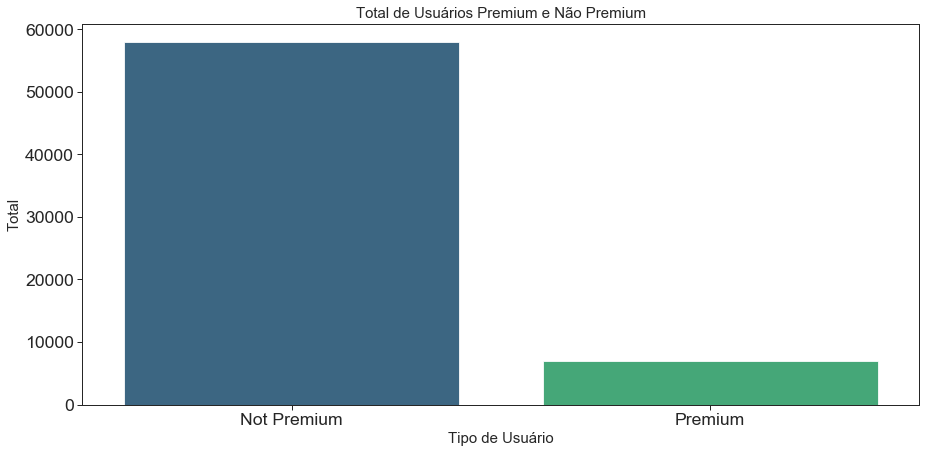

In [141]:
plt.figure(figsize=(15,7))
sns.countplot(dataset['isPremium'], palette='viridis')
plt.xlabel('Tipo de Usuário', fontsize=15)
plt.ylabel('Total', fontsize=15)
plt.title('Total de Usuários Premium e Não Premium', fontsize=15)
plt.show()

Para a próxima análise vamos verificar o número de sessões dos estudantes. Quem acessa mais a plataforma do passei direto? Estudantes premiums ou não-premiums? Para isso utilizaremos o método analítico mas sem a exclusão de duplicatas, pois um mesmo usuário pode acessar a plataforma mais de uma vez e é interessante para nós sabermos o número de sessões totais de cada tipo de usuário.

In [142]:
dataset = pd.merge(students, premium_students, how='outer',on='StudentId')
dataset = pd.merge(dataset, premium_payments, how='outer',on='StudentId')
dataset = pd.merge(dataset, premium_cancellations, how='outer',on='StudentId')
dataset = pd.merge(dataset, sessions, how='outer',on='StudentId')

dataset = dataset.fillna(0)
dataset['isPremium'] = 'Premium'
dataset['isPremium'].loc[(dataset['PlanType'] == 0) & (dataset['SubscriptionDate'] == 0) & (dataset['CancellationDate'] == 0)]= 'Not Premium'
dataset.head()

,City,CourseName,StudentId,RegisteredDate,SignupSource,State,StudentClient,UniversityName,SubscriptionDate,PaymentDate,PlanType,CancellationDate,SessionStartTime,isPremium
0,0,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,0,PUC-RIO,0,2017-05-26 22:25:03.000000,Anual,0,2017-02-20 14:51:37,Premium
1,0,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,0,PUC-RIO,0,2017-05-26 22:25:03.000000,Anual,0,2017-02-22 14:04:34,Premium
2,0,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,0,PUC-RIO,0,2017-05-26 22:25:03.000000,Anual,0,2017-02-23 13:46:14,Premium
3,0,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,0,PUC-RIO,0,2017-05-26 22:25:03.000000,Anual,0,2017-02-23 14:52:24,Premium
4,0,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,0,PUC-RIO,0,2017-05-26 22:25:03.000000,Anual,0,2017-03-03 20:47:21,Premium


In [143]:
len(dataset)

1910580

Vemos que os poucos mais de 57k de alunos não premiums acessaram num total de 1.247.479 vezes a plataforma, nos dando uma proporção de aproximadamente 21 sessões por aluno. Para os premiums temos aproximadamente 95 sessões por pessoa. Logo, os alunos premiums acessam muito mais a plataforma do que os não premiums

In [144]:
dataset_count = dataset.groupby(['isPremium'])['SessionStartTime'].count().to_frame()

dataset_count = dataset_count.reset_index()

dataset_count.head()

,isPremium,SessionStartTime
0,Not Premium,1247479
1,Premium,663101


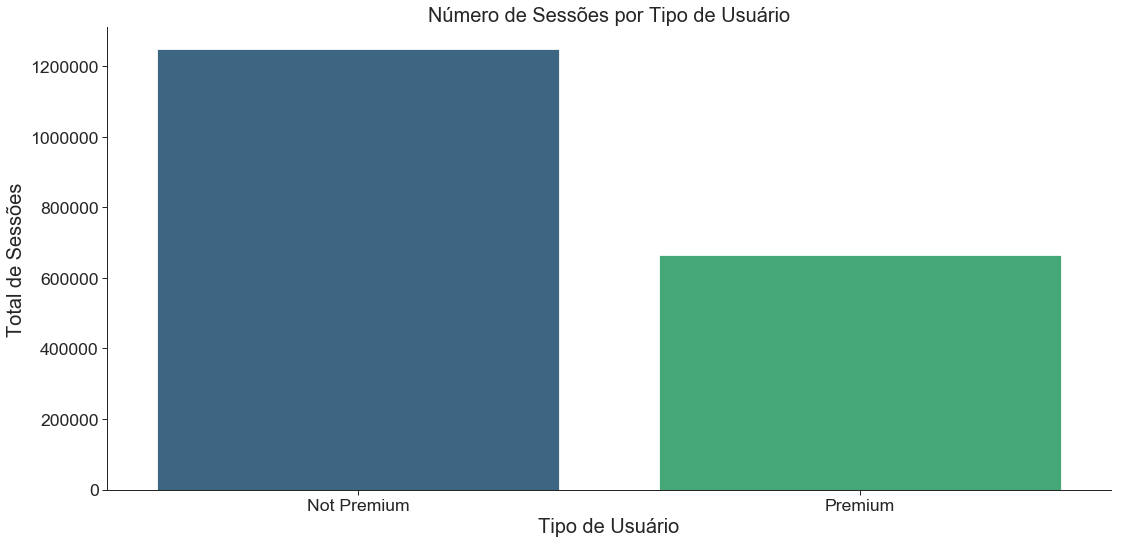

In [145]:
make_plot(dataset_count['isPremium'], 
          dataset_count['SessionStartTime'], 
          None, 
          'Tipo de Usuário', 
          'Total de Sessões', 
          'Número de Sessões por Tipo de Usuário')

Para a próxima análise vamos verificar o número de perguntas e respostas dos estudantes. Quem utiliza mais essas features do passei direto? Estudantes premiums ou não-premiums? Para isso utilizaremos o método analítico mas sem a exclusão de duplicatas, pois um mesmo usuário pode fazer várias perguntas e dar várias respostas e é interessante para nós sabermos o número de perguntas e respostas totais de cada tipo de usuário.

In [146]:
dataset = pd.merge(students, premium_students, how='outer',on='StudentId')
dataset = pd.merge(dataset, premium_payments, how='outer',on='StudentId')
dataset = pd.merge(dataset, premium_cancellations, how='outer',on='StudentId')
dataset = pd.merge(dataset, questions, how='outer',on='StudentId')
dataset = pd.merge(dataset, answers, how='outer',on='StudentId')

dataset = dataset.fillna(0)
dataset['isPremium'] = 'Premium'
dataset['isPremium'].loc[(dataset['PlanType'] == 0) & 
                         (dataset['SubscriptionDate'] == 0) & 
                         (dataset['CancellationDate'] == 0)]= 'Not Premium'
dataset.head()

,City,CourseName,StudentId,RegisteredDate,SignupSource,State,StudentClient,UniversityName,SubscriptionDate,PaymentDate,PlanType,CancellationDate,QuestionDate,QuestionSnippet,AnswerDate,AnswerSnippet,isPremium
0,0,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,0,PUC-RIO,0,2017-05-26 22:25:03.000000,Anual,0,2013-09-04 14:09:25.963000,O que é mais importante para um projeto: escop...,2013-08-30 12:27:57.190000,"<p>Vou tentar <span style=""text-decoration: un...",Premium
1,0,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,0,PUC-RIO,0,2017-05-26 22:25:03.000000,Anual,0,2013-09-04 14:09:25.963000,O que é mais importante para um projeto: escop...,2013-09-04 14:03:18.240000,<p>O <strong>centil</strong> divide algo em 10...,Premium
2,0,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,0,PUC-RIO,0,2017-05-26 22:25:03.000000,Anual,0,2013-09-04 14:09:25.963000,O que é mais importante para um projeto: escop...,2013-09-05 13:20:09.513000,<p>Ou ser&aacute; que o problema que esses pro...,Premium
3,0,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,0,PUC-RIO,0,2017-05-26 22:25:03.000000,Anual,0,2013-09-04 14:09:25.963000,O que é mais importante para um projeto: escop...,2013-09-04 19:01:56.357000,<p>Excelente pergunta! Abaixo est&atilde;o as ...,Premium
4,0,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,0,PUC-RIO,0,2017-05-26 22:25:03.000000,Anual,0,2013-09-04 14:09:25.963000,O que é mais importante para um projeto: escop...,2013-11-12 00:06:05.200000,<p>Vamos supor que voc&ecirc; se compromete a ...,Premium


In [147]:
len(dataset)

94464

Vemos que os poucos mais de 57k de alunos não premiums fizeram um total de 74.173 perguntas e respostas, nos dando uma proporção de aproximadamente 1 pergunta/resposta por aluno. Para os premiums temos aproximadamente 3 pergunta/resposta por pessoa. Logo, os alunos premiums utilizam mais esses recursos do que os não premiums

In [148]:
dataset_count_questions = dataset.groupby(['isPremium'])['QuestionSnippet'].count().to_frame()

dataset_count_questions = dataset_count_questions.reset_index()

dataset_count_questions.head()

,isPremium,QuestionSnippet
0,Not Premium,74173
1,Premium,20291


In [149]:
dataset_count_answers = dataset.groupby(['isPremium'])['AnswerSnippet'].count().to_frame()

dataset_count_answers = dataset_count_answers.reset_index()

dataset_count_answers.head()

,isPremium,AnswerSnippet
0,Not Premium,74173
1,Premium,20291


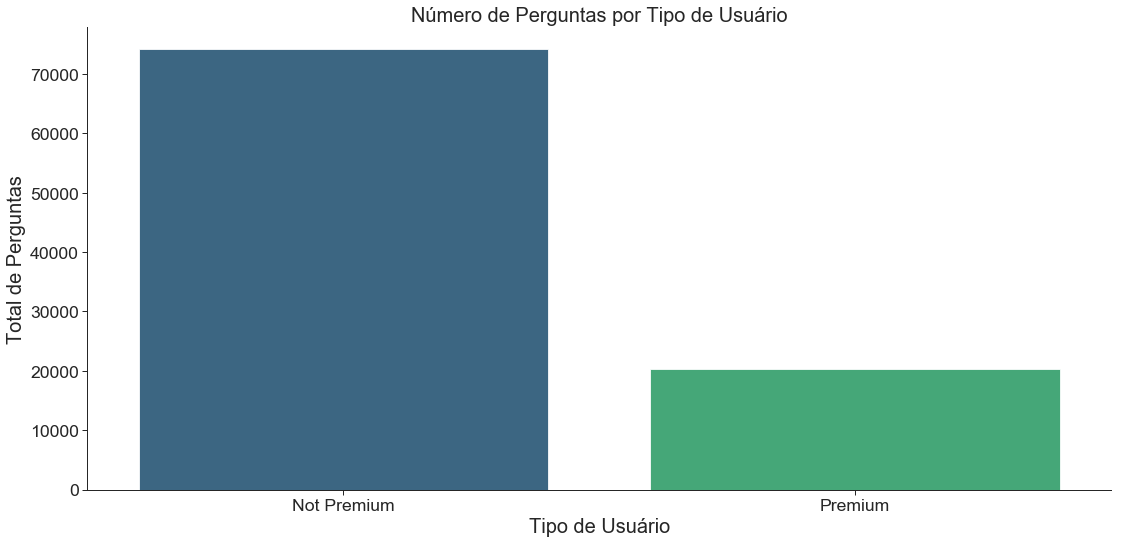

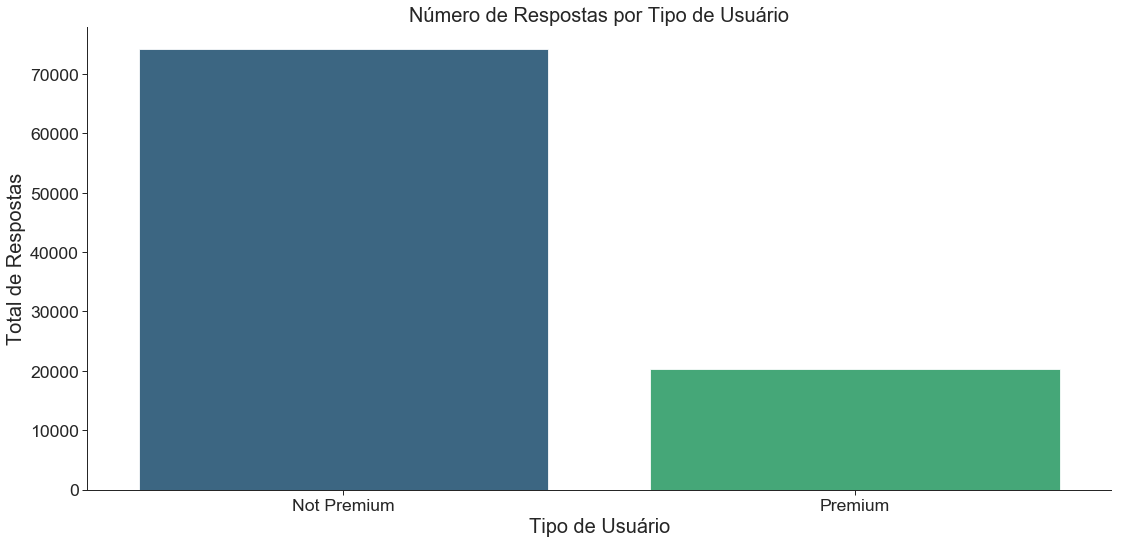

In [150]:
make_plot(dataset_count_questions['isPremium'], 
          dataset_count_questions['QuestionSnippet'], 
          None, 
          'Tipo de Usuário', 
          'Total de Perguntas', 
          'Número de Perguntas por Tipo de Usuário')

make_plot(dataset_count_answers['isPremium'], 
          dataset_count_answers['AnswerSnippet'], 
          None, 
          'Tipo de Usuário', 
          'Total de Respostas', 
          'Número de Respostas por Tipo de Usuário')

Para a próxima análise vamos verificar o número de disciplinas seguidas pelos estudantes. Quem segue mais disciplinas no passei direto? Estudantes premiums ou não-premiums? Para isso utilizaremos o método analítico mas sem a exclusão de duplicatas, pois um mesmo usuário pode seguir várias disciplinas e é interessante para nós sabermos o número de disciplinas totais de cada tipo de usuário.

In [151]:
dataset = pd.merge(students, premium_students, how='outer',on='StudentId')
dataset = pd.merge(dataset, premium_payments, how='outer',on='StudentId')
dataset = pd.merge(dataset, premium_cancellations, how='outer',on='StudentId')
dataset = pd.merge(dataset, subjects, how='outer',on='StudentId')

dataset.dropna(subset=['SubjectName'], inplace=True)
dataset = dataset.fillna(0)
dataset['isPremium'] = 'Premium'
dataset['isPremium'].loc[(dataset['PlanType'] == 0) & 
                         (dataset['SubscriptionDate'] == 0) & 
                         (dataset['CancellationDate'] == 0)]= 'Not Premium'
dataset.head()

,City,CourseName,StudentId,RegisteredDate,SignupSource,State,StudentClient,UniversityName,SubscriptionDate,PaymentDate,PlanType,CancellationDate,FollowDate,SubjectName,isPremium
0,0,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,0,PUC-RIO,0,2017-05-26 22:25:03.000000,Anual,0,2015-09-12 16:00:11.000000,Disciplina Integradora II,Premium
1,0,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,0,PUC-RIO,0,2017-05-26 22:25:03.000000,Anual,0,2015-09-12 16:00:11.000000,Pesquisa Operacional,Premium
2,0,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,0,PUC-RIO,0,2017-05-26 22:25:03.000000,Anual,0,2016-06-07 17:07:35.000000,Cálculo I,Premium
3,0,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,0,PUC-RIO,0,2017-05-26 22:25:03.000000,Anual,0,2015-09-12 16:00:11.000000,Introdução à Administração,Premium
4,0,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,0,PUC-RIO,0,2017-05-26 22:25:03.000000,Anual,0,2015-09-12 16:00:11.000000,Contabilidade Aplicada à Administração,Premium


In [152]:
len(dataset)

366564

Vemos que os poucos mais de 57k de alunos não premiums seguem um total de 300.368 disciplinas, nos dando uma proporção de aproximadamente 5 disciplinas por aluno. Para os premiums temos aproximadamente 9 disciplinas por pessoa. Logo, os alunos premiums seguem mais disciplinas do que os não premiums.

In [153]:
dataset_count = dataset.groupby(['isPremium'])['SubjectName'].count().to_frame()

dataset_count = dataset_count.reset_index()

dataset_count.head()

,isPremium,SubjectName
0,Not Premium,300368
1,Premium,66196


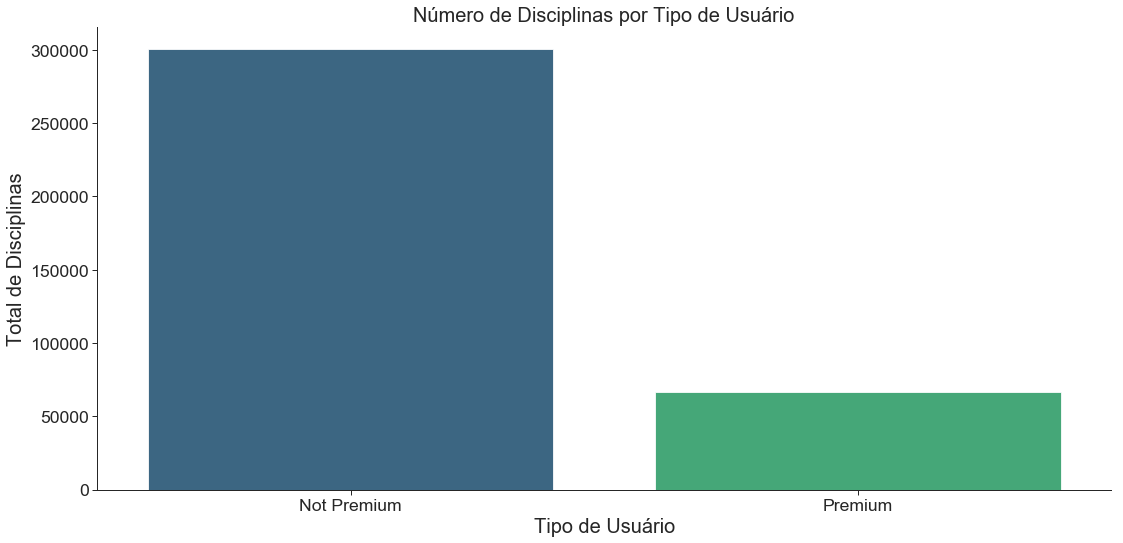

In [154]:
make_plot(dataset_count['isPremium'], 
          dataset_count['SubjectName'], 
          None, 
          'Tipo de Usuário', 
          'Total de Disciplinas', 
          'Número de Disciplinas por Tipo de Usuário')

Vamos observar quais sãos as top 5 disciplinas mais seguidas pelo usuários premiums e não premiuns. Temos então a seguir o rank das 5  mais seguidas onde cálculo I e Matemática Financeira aparece em ambos.

In [155]:
dataset_total = dataset.groupby(['isPremium'])['SubjectName'].value_counts().to_frame()
dataset_total = dataset_total.rename(columns={'SubjectName':'Total'})
dataset_total = dataset_total.reset_index()
dataset_total = dataset_total.groupby('isPremium').apply(lambda x: x.nlargest(5, 'Total')).reset_index(drop=True)

dataset_total.head(10)

,isPremium,SubjectName,Total
0,Not Premium,Bioquímica,4143
1,Not Premium,Cálculo I,3985
2,Not Premium,Anatomia Humana,3923
3,Not Premium,Direito Constitucional,3839
4,Not Premium,Matemática Financeira,3250
5,Premium,Cálculo I,577
6,Premium,Matemática Financeira,542
7,Premium,Cálculo II,492
8,Premium,Física I,486
9,Premium,Álgebra Linear,454


Como temos o mesmo agrupador para ambos os valores no eixo X, nossa função deixa de funcionar pois tal valor se torna ambíguo e é necessário então utilizar o código pura da plotagem.

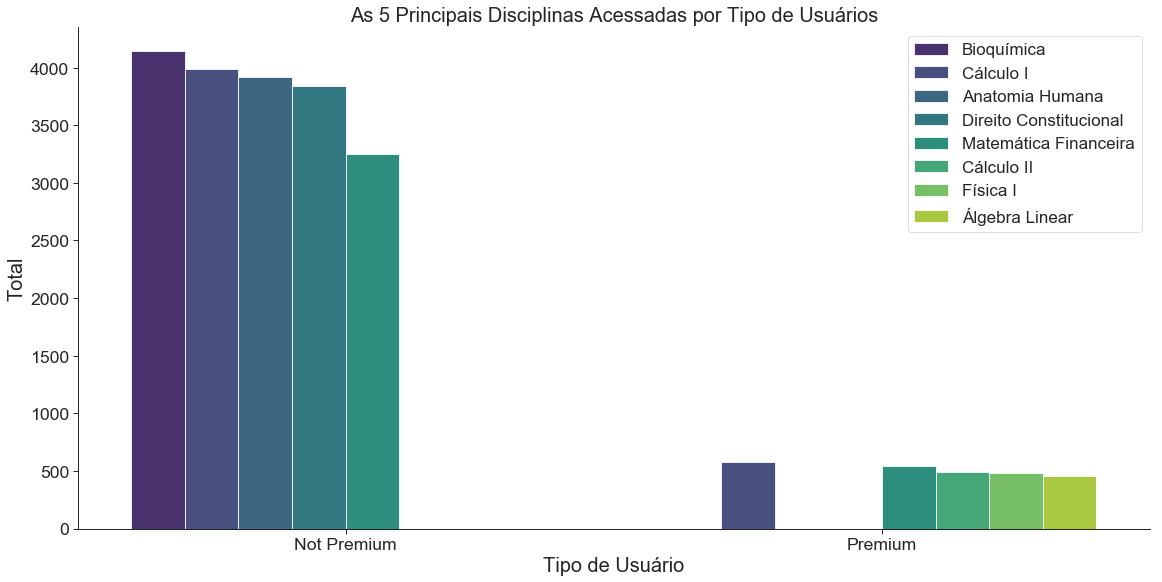

In [156]:
sns.set_context("paper", font_scale=2, rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20}) 
sns.set_style('ticks')
ax = sns.catplot(x='isPremium', y='Total', 
            hue='SubjectName', 
            palette = "viridis",
            ci = None,
            data=dataset_total, 
            height=8.27, 
            aspect=20/10,
            legend=False,
            kind='bar')
plt.xlabel('Tipo de Usuário')
plt.ylabel('Total')
plt.title('As 5 Principais Disciplinas Acessadas por Tipo de Usuários')
plt.legend(fontsize=17)
#sns.despine()
plt.show()

Para a próxima análise vamos verificar o número de arquivos visualizados pelos estudantes. Quem visualiza mais arquivos no Passei Direto? Estudantes premiums ou não-premiums? Para isso utilizaremos o método analítico mas sem a exclusão de duplicatas, pois um mesmo usuário pode visualizar vários arquivos e é interessante para nós sabermos o número de arquivos totais de cada tipo de usuário.

In [231]:
dataset = pd.merge(students, premium_students, how='outer',on='StudentId')
dataset = pd.merge(dataset, premium_payments, how='outer',on='StudentId')
dataset = pd.merge(dataset, premium_cancellations, how='outer',on='StudentId')
dataset = pd.merge(dataset, fileViews, how='outer',on='StudentId')

dataset.dropna(subset=['FileName'], inplace=True)
dataset = dataset.fillna(0)
dataset['isPremium'] = 'Premium'
dataset['isPremium'].loc[(dataset['PlanType'] == 0) & 
                         (dataset['SubscriptionDate'] == 0) & 
                         (dataset['CancellationDate'] == 0)]= 'Not Premium'
dataset.head()

,City,CourseName,StudentId,RegisteredDate,SignupSource,State,StudentClient,UniversityName,SubscriptionDate,PaymentDate,PlanType,CancellationDate,FileName,ViewDate,isPremium
0,0,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,0,PUC-RIO,0,2017-05-26 22:25:03.000000,Anual,0,Exercicios Resolvidos do Halliday sobre Rotaçã...,2017-02-23 10:46:03.047000,Premium
1,0,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,0,PUC-RIO,0,2017-05-26 22:25:03.000000,Anual,0,Exercicios Resolvidos do Halliday sobre Rotaçã...,2017-02-23 10:46:12.370000,Premium
2,0,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,0,PUC-RIO,0,2017-05-26 22:25:03.000000,Anual,0,CALCULO I,2017-05-25 22:39:48.000000,Premium
3,0,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,0,PUC-RIO,0,2017-05-26 22:25:03.000000,Anual,0,CALCULO I,2017-05-25 22:40:36.000000,Premium
4,0,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,0,PUC-RIO,0,2017-05-26 22:25:03.000000,Anual,0,CALCULO I,2017-05-25 22:43:16.000000,Premium


In [232]:
len(dataset)

4649004

Vemos que os poucos mais de 57k de alunos não premiums visualizaram um total de 2.519.416, nos dando uma proporção de aproximadamente 43 arquivos visualizados por aluno. Para os premiums temos aproximadamente 305 arquivos por pessoa. Logo, os alunos premiums visualizam muito mais arquivos do que os não premiums.

In [233]:
dataset_count = dataset.groupby(['isPremium'])['FileName'].count().to_frame()

dataset_count = dataset_count.reset_index()

dataset_count.head()

,isPremium,FileName
0,Not Premium,2519416
1,Premium,2129588


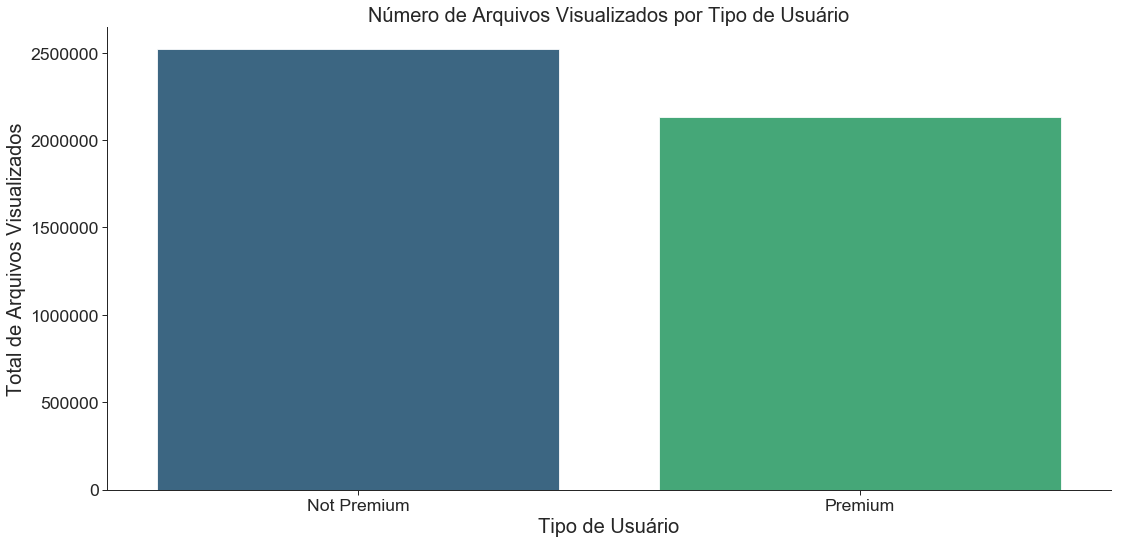

In [234]:
make_plot(dataset_count['isPremium'], 
          dataset_count['FileName'], 
          None, 
          'Tipo de Usuário', 
          'Total de Arquivos Visualizados', 
          'Número de Arquivos Visualizados por Tipo de Usuário')

Vamos observar quais sãos os top 5 arquivos mais visualizados pelo usuários premiums e não premiuns. Temos então a seguir o rank dos 5 mais seguidas onde AV1, AV2, Avaliando o aprendizado, BDQ Prova aparecem em ambos

In [235]:
dataset_total = dataset.groupby(['isPremium'])['FileName'].value_counts().to_frame()
dataset_total = dataset_total.rename(columns={'FileName':'Total'})
dataset_total = dataset_total.reset_index()
dataset_total = dataset_total.groupby('isPremium').apply(lambda x: x.nlargest(5, 'Total')).reset_index(drop=True)

dataset_total.head(10)

,isPremium,FileName,Total
0,Not Premium,AV1,1823
1,Not Premium,AV2,1777
2,Not Premium,Avaliando o aprendizado,1347
3,Not Premium,BDQ Prova,1222
4,Not Premium,Resumão Epidemiologia AV1 e AV2,1219
5,Premium,AULA 1 A 10 E SIMULADOS,2683
6,Premium,AV2,2127
7,Premium,AV1,1811
8,Premium,Avaliando o aprendizado,1683
9,Premium,BDQ Prova,1353


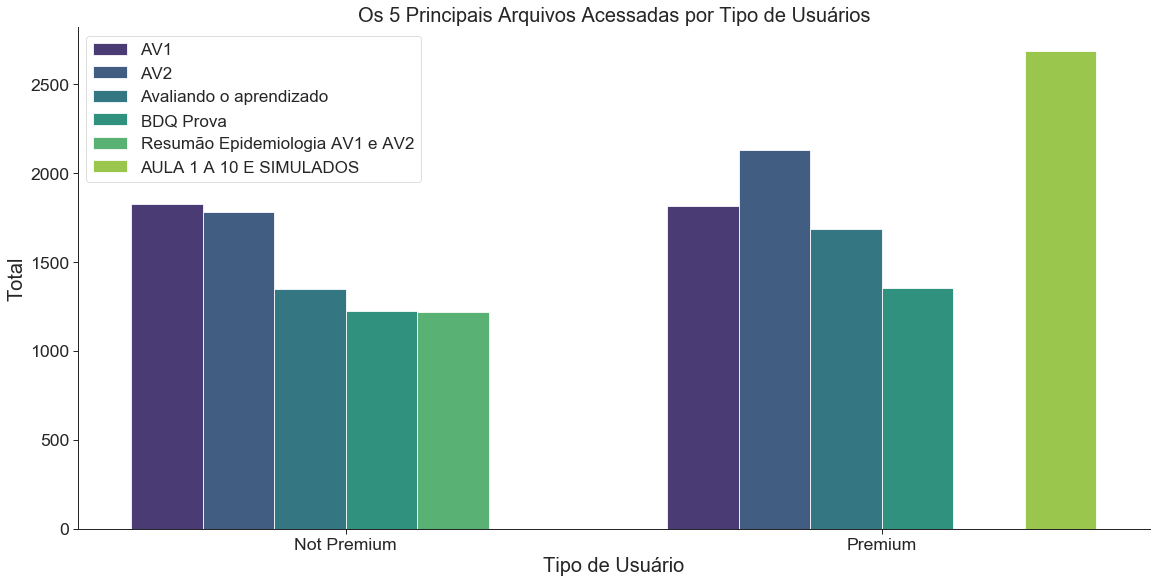

In [236]:
sns.set_context("paper", font_scale=2, rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20}) 
sns.set_style('ticks')
sns.catplot(x='isPremium', y='Total', 
            hue='FileName', 
            palette = "viridis",
            ci = None,
            data=dataset_total, 
            height=8.27, 
            aspect=20/10,
            legend=False,
            kind='bar')
plt.xlabel('Tipo de Usuário')
plt.ylabel('Total')
plt.title('Os 5 Principais Arquivos Acessadas por Tipo de Usuários')
plt.legend(fontsize=17)
#sns.despine()
plt.show()

Para as próximas análises vamos verificar:

- Curso de Origem

- Universidade de Origem

- Fonte de Cadastro

- Fonte de Acesso

- Estado

Assim, nosso método analítico vai sofrer algumas alterções:

- Vamos preencher os valores nulos apenas nas colunas:

    - SubscriptionDate 
    
    - PlanType 
    
    - CancellationDate
    
- Em seguida, vamos tirar as duplicatas, pois cada estudante só pode ter uma fonte de cadastro, uma universidade, um estado e um curso. Um aluno poderia ter várias fontes de acesso, mas como essa informação está na base de estudantes e e nessa base não há duplicatas, cada aluno só pode ter uma fonte de acesso.

- Por fim, retiramos os valores nulos das variáveis que vamos análisar

In [266]:
dataset = pd.merge(students, premium_students, how='outer',on='StudentId')
dataset = pd.merge(dataset, premium_payments, how='outer',on='StudentId')
dataset = pd.merge(dataset, premium_cancellations, how='outer',on='StudentId')

#dataset.dropna(subset=['FileName'], inplace=True)
dataset['SubscriptionDate'] = dataset.SubscriptionDate.fillna(0)
dataset['PlanType'] = dataset.PlanType.fillna(0)
dataset['CancellationDate'] = dataset.CancellationDate.fillna(0)
dataset['isPremium'] = 'Premium'
dataset['isPremium'].loc[(dataset['PlanType'] == 0) & 
                         (dataset['SubscriptionDate'] == 0) & 
                         (dataset['CancellationDate'] == 0)]= 'Not Premium'
dataset.loc[dataset['UniversityName'] == 'ESTÁCIO EAD'] = 'ESTÁCIO'
dataset.head()

,City,CourseName,StudentId,RegisteredDate,SignupSource,State,StudentClient,UniversityName,SubscriptionDate,PaymentDate,PlanType,CancellationDate,isPremium
0,NaN,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,NaN,PUC-RIO,0,2017-05-26 22:25:03.000000,Anual,0,Premium
1,NaN,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,NaN,PUC-RIO,0,2018-05-26 10:05:28.000000,Anual,0,Premium
2,NaN,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,NaN,PUC-RIO,0,2016-07-21 19:57:57.717000,Mensal,0,Premium
3,NaN,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,NaN,PUC-RIO,0,2016-08-21 08:47:42.947000,Mensal,0,Premium
4,NaN,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,NaN,PUC-RIO,0,2016-09-21 08:54:06.270000,Mensal,0,Premium


In [267]:
len(dataset)

71903

In [268]:
dataset.drop_duplicates(subset = 'StudentId', keep=False,inplace=True)

dataset.head()

,City,CourseName,StudentId,RegisteredDate,SignupSource,State,StudentClient,UniversityName,SubscriptionDate,PaymentDate,PlanType,CancellationDate,isPremium
20,Rio de Janeiro,Direito do Trabalho e Segurança Social,59873654,2012-09-03 20:32:04.853000,Facebook,Rio de Janeiro,NaN,UFF,0,NaN,0,0,Not Premium
21,NaN,Enfermagem,3664695,2012-09-10 20:26:30.253000,Facebook,Distrito Federal,NaN,UNB,0,NaN,0,0,Not Premium
22,Resende,Engenharia de Produção Mecânica,15207697,2012-09-05 15:31:08.090000,Facebook,Rio de Janeiro,NaN,UERJ,0,NaN,0,0,Not Premium
23,NaN,Engenharia Elétrica,36988693,2012-10-15 21:34:51.143000,Facebook,NaN,NaN,UFU,0,NaN,0,0,Not Premium
24,NaN,Química,1001195,2012-10-15 21:35:05.540000,Facebook,Espirito Santo,NaN,UFES,0,NaN,0,0,Not Premium


In [269]:
len(dataset)

63623

In [270]:
dataset.isna().sum()

City                45244
CourseName           6256
StudentId               0
RegisteredDate       6256
SignupSource         6256
State               41427
StudentClient       14124
UniversityName       6256
SubscriptionDate        0
PaymentDate         63002
PlanType                0
CancellationDate        0
isPremium               0
dtype: int64

In [271]:
datasetState = dataset.dropna(subset=['State'])
datasetStudentClient = dataset.dropna(subset=['StudentClient'])
datasetCourse = dataset.dropna(subset=['CourseName'])
datasetUniversityName = dataset.dropna(subset=['UniversityName'])
datasetSignupSource = dataset.dropna(subset=['SignupSource'])

Tais informações são todas provenientes da base students, onde a maioria não é premium. Logo, haverá muita disparidades nos números de premiums e não premiuns. Tais análises tem carater apenas exploratório para podermos conhecer mais os nossos dados.

Para a fonte de cadastro, tanto premiuns quanto não premiums utilizam mais o facebook para cadastro.

In [272]:
dataset_total = datasetSignupSource.groupby(['isPremium'])['SignupSource'].value_counts().to_frame()
dataset_total = dataset_total.rename(columns={'SignupSource':'Total'})
dataset_total = dataset_total.reset_index()

dataset_total.head(10)

,isPremium,SignupSource,Total
0,Not Premium,Facebook,28653
1,Not Premium,Google,18461
2,Not Premium,Email,9588
3,Premium,Facebook,307
4,Premium,Google,209
5,Premium,Email,149


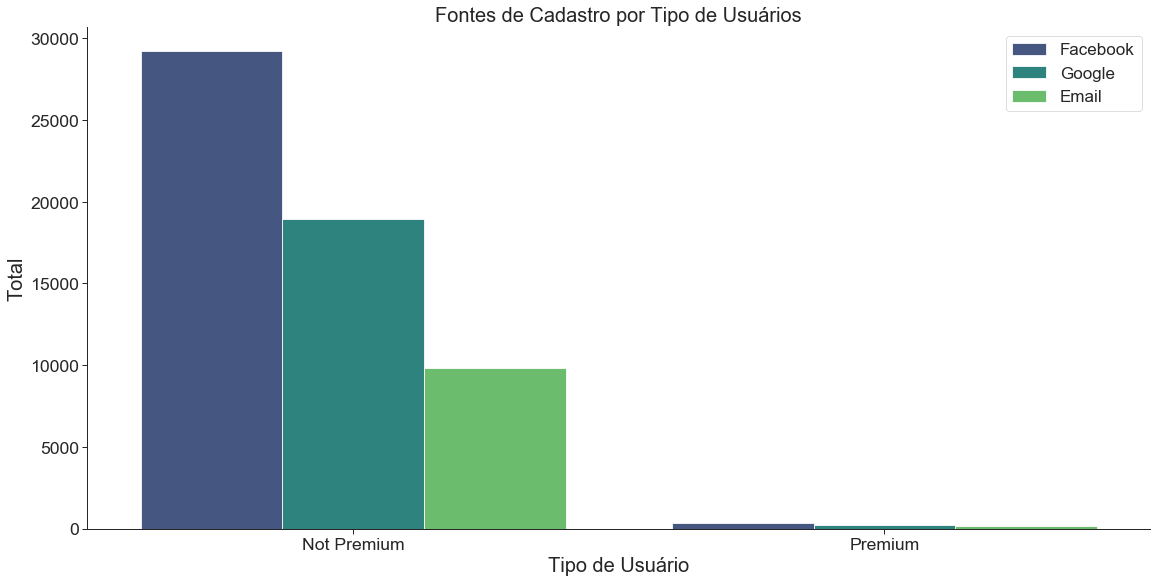

In [258]:
sns.set_context("paper", font_scale=2, rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20}) 
sns.set_style('ticks')
sns.catplot(x='isPremium', y='Total', 
            hue='SignupSource', 
            palette = "viridis",
            ci = None,
            data=dataset_total, 
            height=8.27, 
            aspect=20/10,
            legend=False,
            kind='bar')
plt.xlabel('Tipo de Usuário')
plt.ylabel('Total')
plt.title('Fontes de Cadastro por Tipo de Usuários')
plt.legend(fontsize=17)
plt.show()

Para a fonte de acesso, foi necessário um tratamento a mais. Temos três fontes marjoritárias:

- Website

- WebApp

- Mobile

E temos um séria de outras fontes que nada mais são do que fontes mobiles. Logo, tudo que não fosse Website e webApp, se torna Mobile

In [245]:
datasetStudentClient.StudentClient.unique()

array(['Website', 'Mobile', 'Android | 4.0.4 | sdk 15', 'iOS | 7.0.5',
       'Android | 4.4.2 | sdk 19', 'iOS | 7.0.4',
       'Android | 4.2.2 | sdk 17', 'Android | 4.1.2 | sdk 16',
       'Android | 2.3.6 | sdk 10', 'Android | 4.3 | sdk 18',
       'Android | 2.3.3 | sdk 10', 'iOS | 7.0.6', 'iOS | 7.1',
       'Android | 4.0.3 | sdk 15', 'iOS | 6.1.3', 'iOS | 7.1.1',
       'iOS | 7.0.2', 'Android | 4.2.1 | sdk 17', 'iOS | 6.1.6',
       'Android | 4.4.3 | sdk 19', 'Android | 4.1.1 | sdk 16',
       'iOS | 7.1.2', 'Android | 2.3.7 | sdk 10',
       'Android | 4.4.4 | sdk 19', 'iOS | 7.0', 'Android | 3.2 | sdk 13',
       'iOS | 7.0.3', 'iOS | 8.0', 'iOS | 8.0.2',
       'Android | 2.3.5 | sdk 10', 'iOS | 8.1', 'iOS | 8.1.1',
       'Android | 5.0 | sdk 21', 'iOS | 8.1.2',
       'Android | 5.0.2 | sdk 21', 'iOS | 8.1.3', 'iOS | 8.2',
       'Android | 5.0.1 | sdk 21', 'iOS | 8.3', 'Android | 5.1 | sdk 22',
       'iOS | 8.4', 'Android | 4.4.4 | sdk 17', 'iOS | 8.4.1',
       'Androi

In [246]:
datasetStudentClient.loc[(dataset['StudentClient'] != 'Website') & 
                  (dataset['StudentClient'] != 'Webapp') & 
                  (dataset['StudentClient'] != 'Mobile'),'StudentClient'] = 'Mobile'

datasetStudentClient.head()

,City,CourseName,StudentId,RegisteredDate,SignupSource,State,StudentClient,UniversityName,SubscriptionDate,PaymentDate,PlanType,CancellationDate,isPremium
3720,NaN,Física / Ciências Físicas,94738949,2014-02-04 15:19:39.720000,Facebook,NaN,Website,USP-SP,0,NaN,0,0,Not Premium
3721,Curitibanos,Contabilidade / Ciências Contábeis,9393346,2014-02-04 15:31:23.360000,Email,Santa Catarina,Website,UFSC,0,NaN,0,0,Not Premium
3722,NaN,Direito,37812174,2014-02-04 16:22:00.360000,Email,NaN,Website,UFMT,0,NaN,0,0,Not Premium
3723,Betim,Engenharia Mecânica,45480062,2014-02-04 16:48:37.150000,Email,Minas Gerais,Website,PUC-MINAS,0,NaN,0,0,Not Premium
3724,São Paulo,Fisioterapia,89068306,2014-02-04 17:27:18.850000,Facebook,São Paulo,Website,UNICSUL,0,NaN,0,0,Not Premium


In [247]:
datasetStudentClient.StudentClient.unique()

array(['Website', 'Mobile', 'Webapp'], dtype=object)

Vemos que tanto premiuns quanto não premiums utilizam mais o site para acessar a plataforma.

In [248]:
dataset_total = datasetStudentClient.groupby(['isPremium'])['StudentClient'].value_counts().to_frame()
dataset_total = dataset_total.rename(columns={'StudentClient':'Total'})
dataset_total = dataset_total.reset_index()
dataset_total.head(10)

,isPremium,StudentClient,Total
0,Not Premium,Website,37026
1,Not Premium,Mobile,9757
2,Not Premium,Webapp,3217
3,Premium,Website,444
4,Premium,Mobile,90
5,Premium,Webapp,26


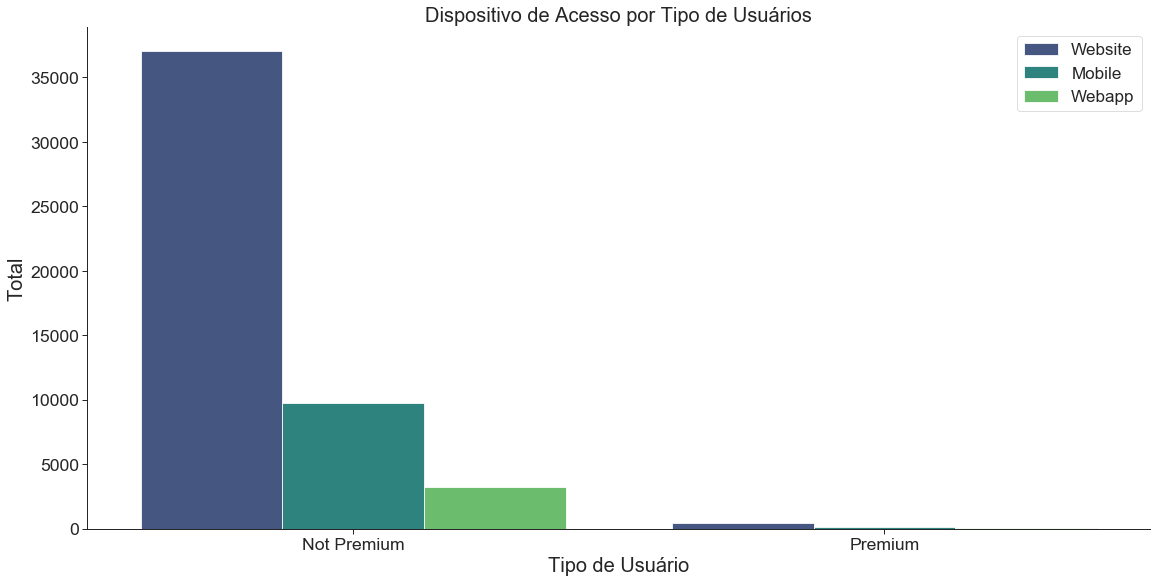

In [249]:
sns.set_context("paper", font_scale=2, rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20}) 
sns.set_style('ticks')
sns.catplot(x='isPremium', y='Total', 
            hue='StudentClient', 
            palette = "viridis",
            ci = None,
            data=dataset_total, 
            height=8.27, 
            aspect=20/10,
            legend=False,
            kind='bar')
plt.xlabel('Tipo de Usuário')
plt.ylabel('Total')
plt.title('Dispositivo de Acesso por Tipo de Usuários')
plt.legend(fontsize=17)
plt.show()

Para o estado, tanto premiuns quanto não premiums são marjoritamente do Sudeste. Aqui elencamento o top 5 estados com mais alunos

In [250]:
dataset_total = datasetState.groupby(['isPremium'])['State'].value_counts().to_frame()
dataset_total = dataset_total.rename(columns={'State':'Total'})
dataset_total = dataset_total.reset_index()
dataset_total = dataset_total.groupby('isPremium').apply(lambda x: x.nlargest(5, 'Total')).reset_index(drop=True)
dataset_total.head(10)

,isPremium,State,Total
0,Not Premium,Rio de Janeiro,4692
1,Not Premium,São Paulo,3711
2,Not Premium,Minas Gerais,2259
3,Not Premium,Paraná,1322
4,Not Premium,Bahia,1259
5,Premium,Rio de Janeiro,178
6,Premium,São Paulo,63
7,Premium,Minas Gerais,27
8,Premium,Paraná,27
9,Premium,Ceara,24


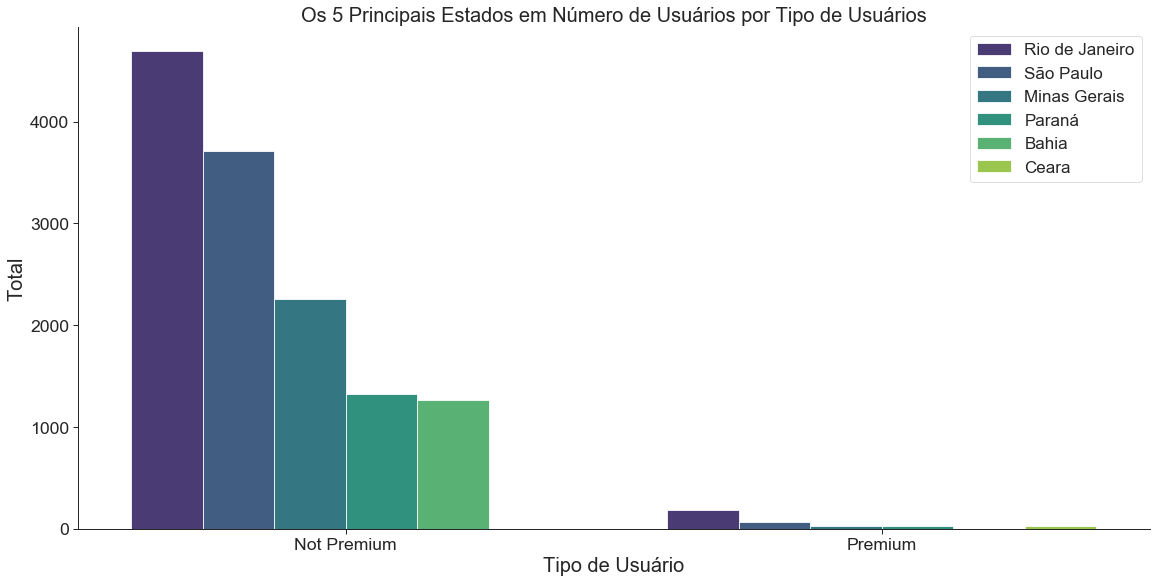

In [251]:
sns.set_context("paper", font_scale=2, rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20}) 
sns.set_style('ticks')
sns.catplot(x='isPremium', y='Total', 
            hue='State', 
            palette = "viridis",
            ci = None,
            data=dataset_total, 
            height=8.27, 
            aspect=20/10,
            legend=False,
            kind='bar')
plt.xlabel('Tipo de Usuário')
plt.ylabel('Total')
plt.title('Os 5 Principais Estados em Número de Usuários por Tipo de Usuários')
plt.legend(fontsize=17)
plt.show()

Para as top 5 universidade, tanto premiuns quanto não premiums são provenientes de:

- ESTÁCIO

- UNIP

- UNOPAR

- UNINTER

- UNIDERP - ANHANGUERA

A base continham uma distinção entre Estácio e Estácio EAD, entende-se que ambas são a mesma universidade. Logo, anteriormente foi feito um pequeno tratamento na coluna UniversityName. Onde havia ESTÁCIO EAD, fora substituido apenas por ESTÁCIO.

In [273]:
dataset_total = datasetUniversityName.groupby(['isPremium'])['UniversityName'].value_counts().to_frame()
dataset_total = dataset_total.rename(columns={'UniversityName':'Total'})
dataset_total = dataset_total.reset_index()
dataset_total = dataset_total.groupby('isPremium').apply(lambda x: x.nlargest(5, 'Total')).reset_index(drop=True)
dataset_total.head(10)

,isPremium,UniversityName,Total
0,Not Premium,ESTÁCIO,8217
1,Not Premium,UNIP,4243
2,Not Premium,UNOPAR,1756
3,Not Premium,UNINTER,1615
4,Not Premium,UNIDERP - ANHANGUERA,652
5,Premium,ESTÁCIO,245
6,Premium,UNINTER,58
7,Premium,UNIP,52
8,Premium,UNOPAR,11
9,Premium,UNIDERP - ANHANGUERA,8


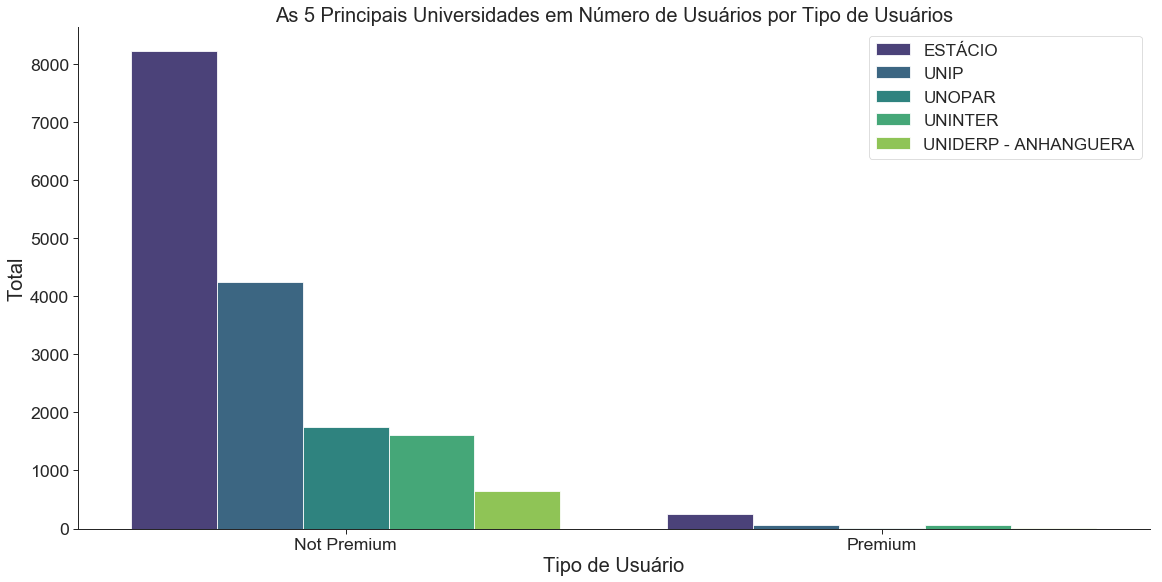

In [274]:
sns.set_context("paper", font_scale=2, rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20}) 
sns.set_style('ticks')
sns.catplot(x='isPremium', y='Total', 
            hue='UniversityName', 
            palette = "viridis",
            ci = None,
            data=dataset_total, 
            height=8.27, 
            aspect=20/10,
            legend=False,
            kind='bar')
plt.xlabel('Tipo de Usuário')
plt.ylabel('Total')
plt.title('As 5 Principais Universidades em Número de Usuários por Tipo de Usuários')
plt.legend(fontsize=17)
plt.show()

Para os top 5 cursos, tanto premiuns quanto não premiums são provenientes de:

- Direito

- Administração

- Engenharia 

- Contabilidade / Ciências Contábeis

- Pedagogia

In [254]:
dataset_total = datasetCourse.groupby(['isPremium'])['CourseName'].value_counts().to_frame()
dataset_total = dataset_total.rename(columns={'CourseName':'Total'})
dataset_total = dataset_total.reset_index()
dataset_total = dataset_total.groupby('isPremium').apply(lambda x: x.nlargest(5, 'Total')).reset_index(drop=True)
dataset_total.head(10)

,isPremium,CourseName,Total
0,Not Premium,Direito,9582
1,Not Premium,Administração,3886
2,Not Premium,Engenharia Civil,3435
3,Not Premium,Contabilidade / Ciências Contábeis,2625
4,Not Premium,Pedagogia,2538
5,Premium,Direito,105
6,Premium,Administração,74
7,Premium,Engenharia Civil,51
8,Premium,Contabilidade / Ciências Contábeis,46
9,Premium,Pedagogia,32


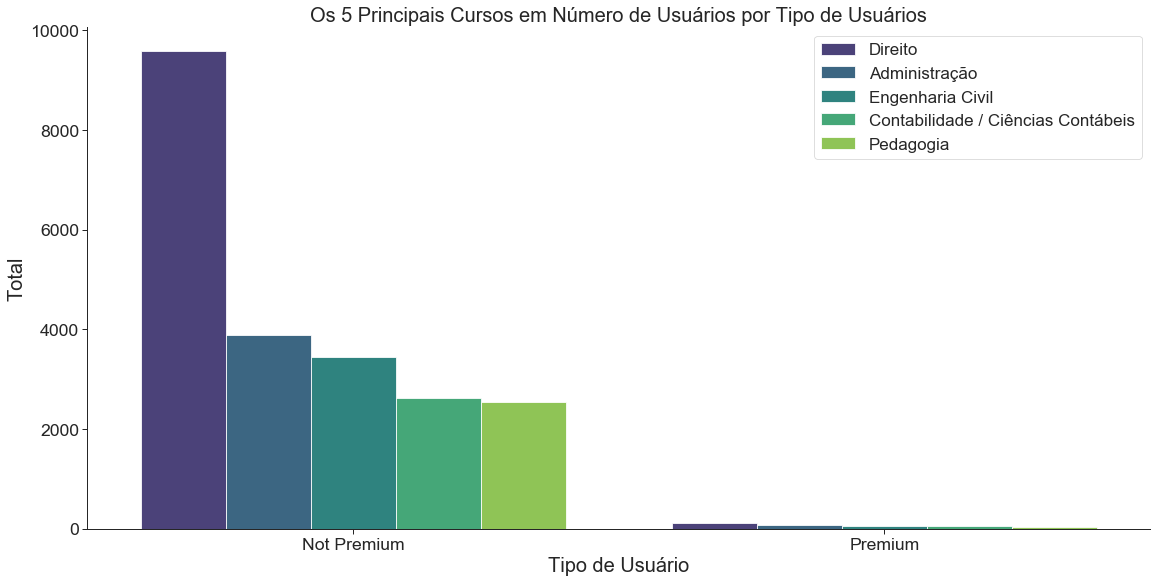

In [255]:
sns.set_context("paper", font_scale=2, rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20}) 
sns.set_style('ticks')
sns.catplot(x='isPremium', y='Total', 
            hue='CourseName', 
            palette = "viridis",
            ci = None,
            data=dataset_total, 
            height=8.27, 
            aspect=20/10,
            legend=False,
            kind='bar')
plt.xlabel('Tipo de Usuário')
plt.ylabel('Total')
plt.title('Os 5 Principais Cursos em Número de Usuários por Tipo de Usuários')
plt.legend(fontsize=17)
plt.show()

##### Questão 2: Em Novembro de 2017 fizemos uma grande mudança no PD: o Content Restriction. Os usuários não Premium passaram a poder consumir no máximo 3 arquivos diferentes por mês. Diante dessa mudança, qual passou a ser o Lifetime Value (LTV) dos usuários Premium a partir de Novembro de 2017?

##### How to Solve

##### - Analisar o  SubscriptionDate a partir de novembro em comparação aos meses anteriores



Para esta questão, analisamos a data de inscrição no premium dos alunos de duas formas:

- Ao longo do mês de novembro

- Ao longo do periodo histórico

In [189]:
dataset = pd.merge(students, premium_students, how='outer', on='StudentId')
dataset.head()

,City,CourseName,StudentId,RegisteredDate,SignupSource,State,StudentClient,UniversityName,SubscriptionDate
0,NaN,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,NaN,PUC-RIO,NaN
1,Rio de Janeiro,Direito do Trabalho e Segurança Social,59873654,2012-09-03 20:32:04.853000,Facebook,Rio de Janeiro,NaN,UFF,NaN
2,NaN,Enfermagem,3664695,2012-09-10 20:26:30.253000,Facebook,Distrito Federal,NaN,UNB,NaN
3,Resende,Engenharia de Produção Mecânica,15207697,2012-09-05 15:31:08.090000,Facebook,Rio de Janeiro,NaN,UERJ,NaN
4,NaN,Engenharia Elétrica,36988693,2012-10-15 21:34:51.143000,Facebook,NaN,NaN,UFU,NaN


In [190]:
len(dataset)

66256

In [191]:
premium_students_november = premium_students.copy()
premium_students_november['SubscriptionDate'] = premium_students_november.SubscriptionDate.str[:10]

premium_students_november.head()

,StudentId,SubscriptionDate
0,98723802,2017-11-01
1,86905029,2017-11-17
2,40935842,2017-11-01
3,83184096,2018-05-18
4,12771137,2017-11-01


In [192]:
premium_students_november = premium_students_november.loc[(premium_students_november['SubscriptionDate'] <= '2017-11-31')]
premium_students_november = premium_students_november.groupby(['SubscriptionDate'])['StudentId'].count().to_frame().reset_index()

premium_students_november.head()

,SubscriptionDate,StudentId
0,2017-11-01,70
1,2017-11-02,106
2,2017-11-03,101
3,2017-11-04,110
4,2017-11-05,216


Vemos que o LTV dos premiums realmente teve um grande crescimento até dia 15 de Novembro. Todavia, caiu no restante do mês e nos meses subsequentes. Logo, o que podemos observar a partir disso?

Primeiramente, já vimos que usuários que não são premiums acessam bem menos as features da plataforma. Talvez, houve um certo 'desespero' dos alunos não premiums nesse primeiro momento, mas posteriormente um entendimento de que o número de arquivos seria suficiente.

No pior caso, esses alunos abandonaram a plataforma de vez.

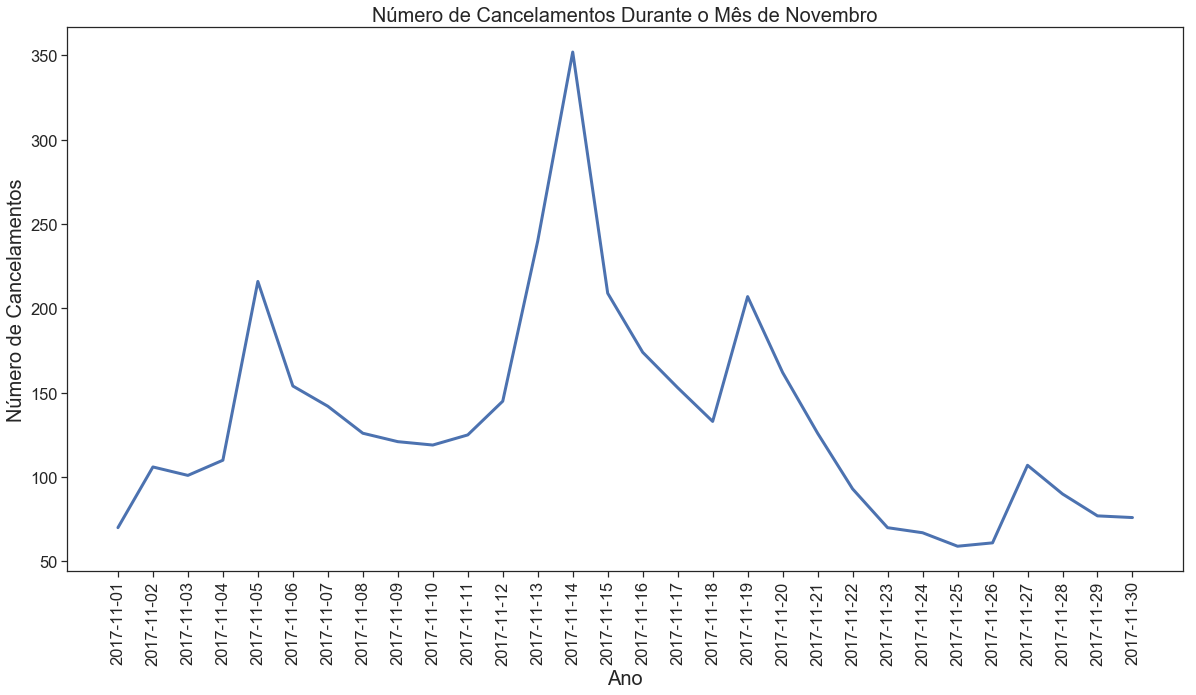

In [204]:
sns.set(style='ticks', font_scale=1.5, rc={"lines.linewidth": 3.0,"font.size":20,"axes.titlesize":20,"axes.labelsize":20})
plt.figure(figsize=(20,10))
sns.lineplot(x='SubscriptionDate', y='StudentId',  
            palette = ['red'],
            ci = None,
            data=premium_students_november)
plt.xticks(premium_students_november['SubscriptionDate'])
plt.xticks(rotation=90)
plt.xlabel('Ano')
plt.ylabel('Número de Cancelamentos')
plt.title('Número de Cancelamentos Durante o Mês de Novembro')
#sns.despine()
plt.show()

In [75]:
premium_students_period = premium_students.copy()
premium_students_period['SubscriptionDate'] = premium_students_period.SubscriptionDate.str[:7]

premium_students_period.head()

,StudentId,SubscriptionDate
0,98723802,2017-11
1,86905029,2017-11
2,40935842,2017-11
3,83184096,2018-05
4,12771137,2017-11


In [76]:
premium_students_period = premium_students_period.groupby(['SubscriptionDate'])['StudentId'].count().to_frame().reset_index()
premium_students_period.head(10)

,SubscriptionDate,StudentId
0,2017-11,3991
1,2017-12,279
2,2018-01,19
3,2018-02,70
4,2018-03,292
5,2018-04,592
6,2018-05,891
7,2018-06,126


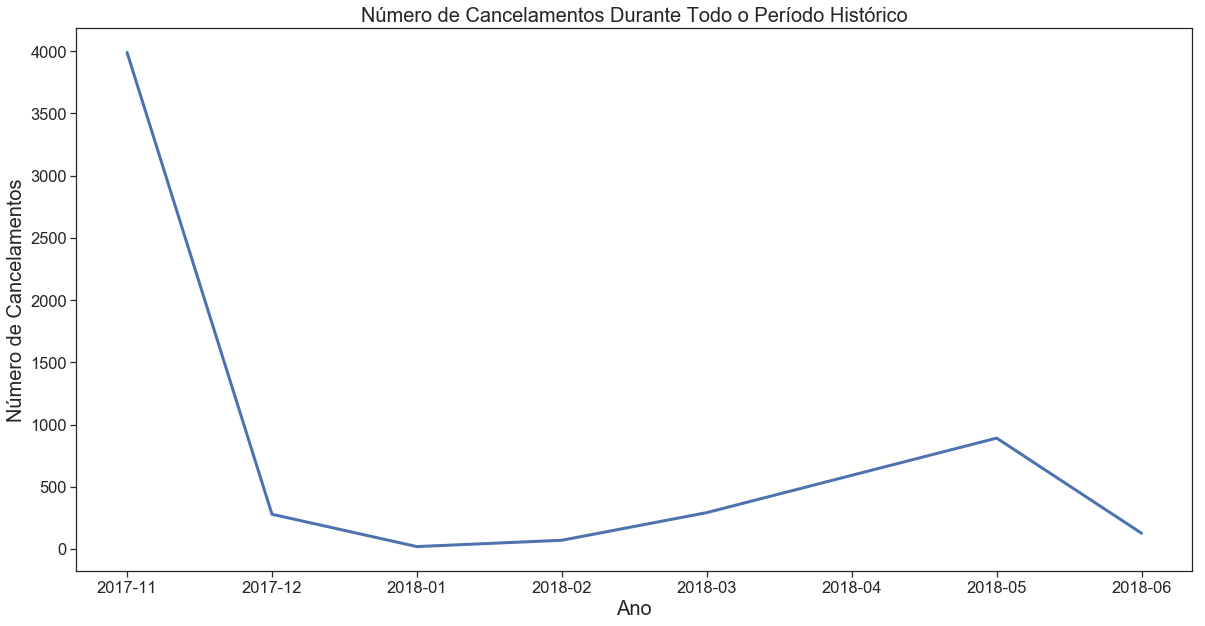

In [203]:
sns.set(style='ticks', font_scale=1.5, rc={"lines.linewidth": 3.0,"font.size":20,"axes.titlesize":20,"axes.labelsize":20})
plt.figure(figsize=(20,10))
sns.lineplot(x='SubscriptionDate', y='StudentId',  
            ci = None,
            data=premium_students_period)
plt.xticks(premium_students_period['SubscriptionDate'])
plt.xlabel('Ano')
plt.ylabel('Número de Cancelamentos')
plt.title('Número de Cancelamentos Durante Todo o Período Histórico')
#sns.despine()
plt.show()

##### Questão 3: Entre os usuários que "Churnaram" solicitando ativamente o cancelamento do Plano Premium, o que está fortemente correlacionado com o cancelamento? (Ex: uso das features, tempo de inatividade, etc)

##### How to Solve

##### - Analisar a data de cancelamento



Partimos da hipótese de que a grande maioria dos cancelamentos da base vem dos estudantes que assinaram o premium no periodo Content Restriction. Ou seja, no impulso, esses estudantes assinaram o premium e depois desistiram do serviço.

Procuramos comprovar nossa hipótese olhando a data de cancelamento do período histórico e criamos uma flag para podermos dizer se tal aluno cancelou ou não o premium.

Criamos então a coluna 'Cancelled' e colocamos o valor 'Sim' para todas as linhas. Verificamos então:

- Se o aluno não era premium: Se o mesmo não possuia o plano então não poderia haver cancelamento. Para esses estudantes foi atribuido o valor '0'

- Se ele era premium e não havia uma data de cancelamento: Se houvesse uma data de cancelamento, então está comprovado que ele pediu o cancelamento do plano. Porém, se não houvesse, partiu-se do princípio que o estudante não pediu ativamente o cancelamento. Logo, para esses estudantes foi atribuido o valor 'Não'

In [205]:
dataset = pd.merge(students, premium_students, how='outer', on='StudentId')
dataset = pd.merge(dataset, premium_payments, how='outer', on='StudentId')
dataset = pd.merge(dataset, premium_cancellations, how='outer', on='StudentId')
dataset.drop_duplicates(subset = 'StudentId', keep=False,inplace=True)

dataset = dataset.fillna(0)

dataset['isPremium'] = 'Sim'
dataset['isPremium'].loc[(dataset['PlanType'] == 0) & (dataset['SubscriptionDate'] == 0) & (dataset['CancellationDate'] == 0)]= 'Não'

dataset['Cancelled'] = 'Sim'
dataset['Cancelled'].loc[(dataset['isPremium'] == 'Não')] = 0
dataset['Cancelled'].loc[(dataset['isPremium'] == 'Sim') & (dataset['CancellationDate'] == 0)] = 'Não'

dataset.head()

,City,CourseName,StudentId,RegisteredDate,SignupSource,State,StudentClient,UniversityName,SubscriptionDate,PaymentDate,PlanType,CancellationDate,isPremium,Cancelled
20,Rio de Janeiro,Direito do Trabalho e Segurança Social,59873654,2012-09-03 20:32:04.853000,Facebook,Rio de Janeiro,0,UFF,0,0,0,0,Não,0
21,0,Enfermagem,3664695,2012-09-10 20:26:30.253000,Facebook,Distrito Federal,0,UNB,0,0,0,0,Não,0
22,Resende,Engenharia de Produção Mecânica,15207697,2012-09-05 15:31:08.090000,Facebook,Rio de Janeiro,0,UERJ,0,0,0,0,Não,0
23,0,Engenharia Elétrica,36988693,2012-10-15 21:34:51.143000,Facebook,0,0,UFU,0,0,0,0,Não,0
24,0,Química,1001195,2012-10-15 21:35:05.540000,Facebook,Espirito Santo,0,UFES,0,0,0,0,Não,0


In [206]:
len(dataset)

64949

Por fim, retiramos da base todos os que tem valor '0' na coluna 'Cancelled' e observamos o total de cancelamentos ativos em cada data. Observamos inicialmente por mês e vemos que há uma grande pico de cancelamento entre novembro e dezembro.

In [207]:
date_cancelled = dataset.loc[dataset['CancellationDate'] != 0]

date_cancelled['CancellationDate'] = date_cancelled.CancellationDate.str[:7]

date_cancelled = date_cancelled.groupby('CancellationDate')['Cancelled'].count().to_frame().reset_index()

date_cancelled = date_cancelled.loc[(date_cancelled['CancellationDate'] >= '2017-01')]

date_cancelled.head()

,CancellationDate,Cancelled
5,2017-01,1
6,2017-02,1
7,2017-03,4
8,2017-04,4
9,2017-05,4


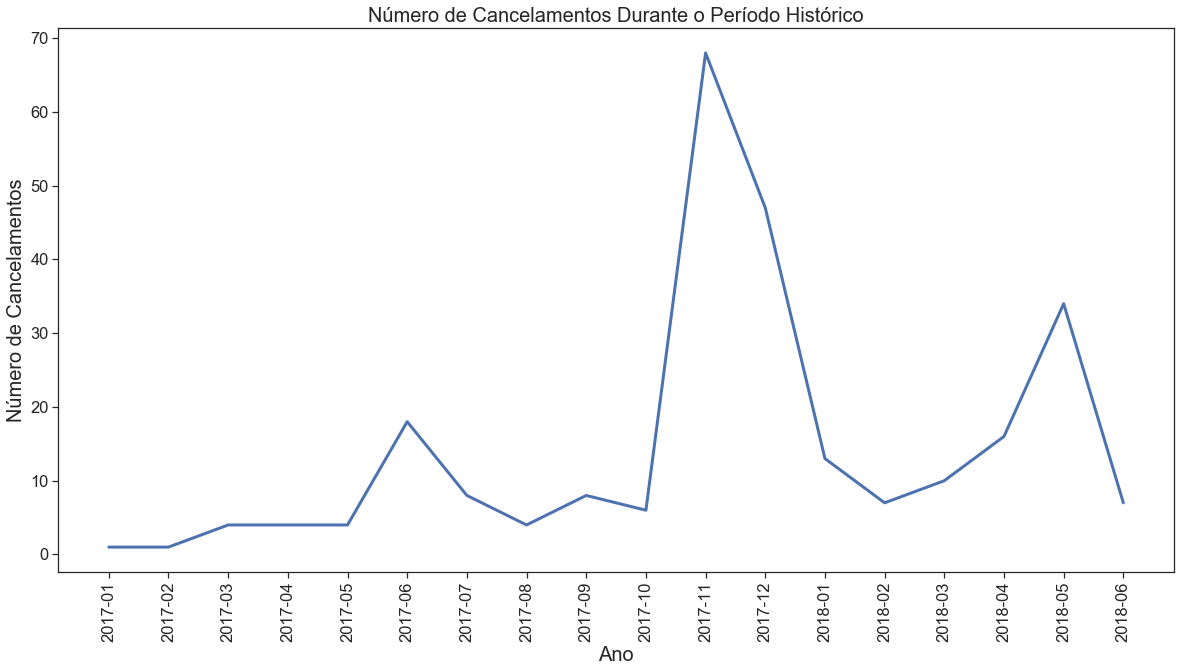

In [209]:
sns.set(style='ticks', font_scale=1.5, rc={"lines.linewidth": 3.0,"font.size":20,"axes.titlesize":20,"axes.labelsize":20})
plt.figure(figsize=(20,10))
sns.lineplot(x='CancellationDate', y='Cancelled',  
            ci = None,
            data=date_cancelled)
plt.xticks(date_cancelled['CancellationDate'])
plt.xlabel('Ano')
plt.xticks(rotation=90)
plt.ylabel('Número de Cancelamentos')
plt.title('Número de Cancelamentos Durante o Período Histórico')
#sns.despine()
plt.show()

Exploramos então tal pico, dessa vez por dia entre Novembro e Dezembro. Observa-se que de fato, a partir do dia 27/11 há grande picos de cancelamento, o que corrobora com a nossa hipótese de que são premiuns que fizeram o subscription após a implantação do Content Restriction, pois o pico do premium subscription se deu dia 15/11.

In [210]:
date_cancelled_nov_dec = dataset.loc[dataset['CancellationDate'] != 0]

date_cancelled_nov_dec['CancellationDate'] = date_cancelled_nov_dec.CancellationDate.str[:10]

date_cancelled_nov_dec = date_cancelled_nov_dec.groupby('CancellationDate')['Cancelled'].count().to_frame().reset_index()

date_cancelled_nov_dec = date_cancelled_nov_dec.loc[(date_cancelled_nov_dec['CancellationDate'] >= '2017-11-01') & 
                                                    (date_cancelled_nov_dec['CancellationDate'] <= '2017-12-31')]

date_cancelled_nov_dec.head()

,CancellationDate,Cancelled
57,2017-11-01,1
58,2017-11-03,1
59,2017-11-05,2
60,2017-11-06,5
61,2017-11-07,1


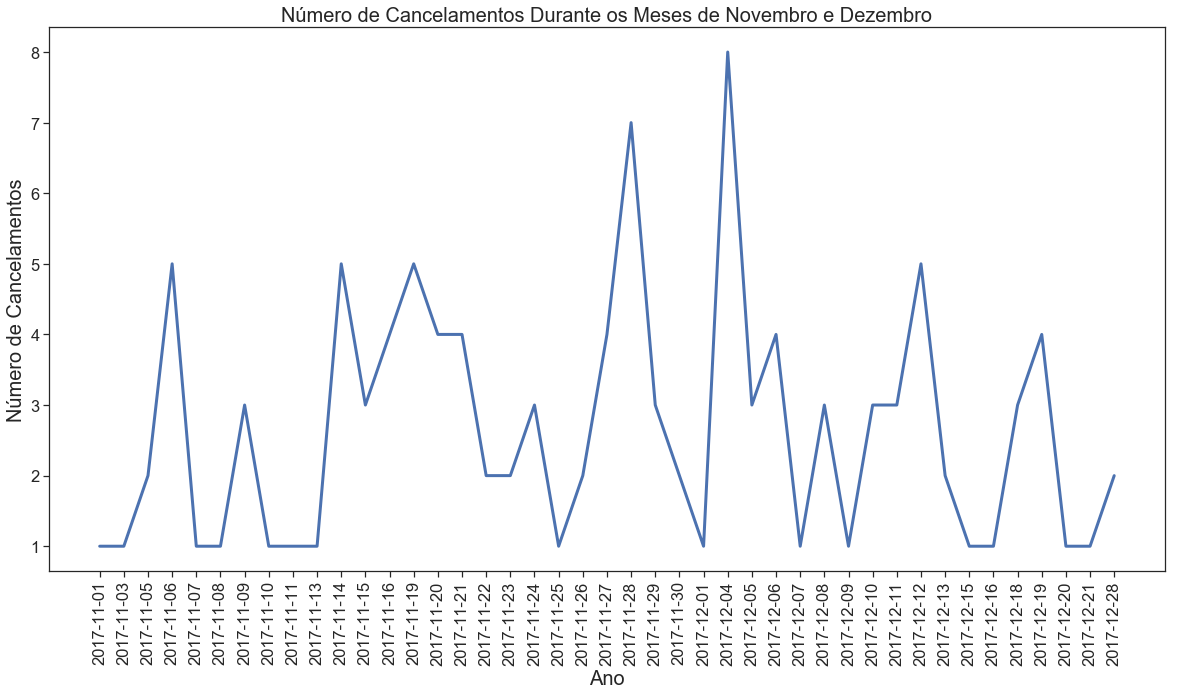

In [211]:
sns.set(style='ticks', font_scale=1.5, rc={"lines.linewidth": 3.0,"font.size":20,"axes.titlesize":20,"axes.labelsize":20})
plt.figure(figsize=(20,10))
sns.lineplot(x='CancellationDate', y='Cancelled',  
            ci = None,
            data=date_cancelled_nov_dec)
plt.xticks(date_cancelled_nov_dec['CancellationDate'])
plt.xticks(rotation=90)
plt.xlabel('Ano')
plt.ylabel('Número de Cancelamentos')
plt.title('Número de Cancelamentos Durante os Meses de Novembro e Dezembro')
#sns.despine()
plt.show()

##### Questão 4: Quais são as 5 maiores universidades no Passei Direto? E quais são os principais tipos de Arquivos consumidos em cada uma delas?

##### How to Solve

##### - Analisar as universidades

##### - Analisar os arquivos visualizados



Para fazer essa questão bastava que olhássemos para a base de students e de fileviews. Só há a informação de universidade da base students. Logo, não há porque cruzarmos com outra. Havíamos visto anteriormente quais eram as principais universidadse agrupadas por premiuns e não premiums e agora é mostrada sem essa distinção.

In [276]:
dataset = students.copy()
dataset.loc[dataset['UniversityName'] == 'ESTÁCIO EAD'] = 'ESTÁCIO'
dataset = dataset.groupby(['UniversityName'])['StudentId'].count().to_frame().reset_index()
dataset = dataset.nlargest(5, 'StudentId')

dataset.head()

,UniversityName,StudentId
178,ESTÁCIO,10365
1512,UNIP,4392
1589,UNOPAR,1784
1510,UNINTER,1780
1413,UNIDERP - ANHANGUERA,671


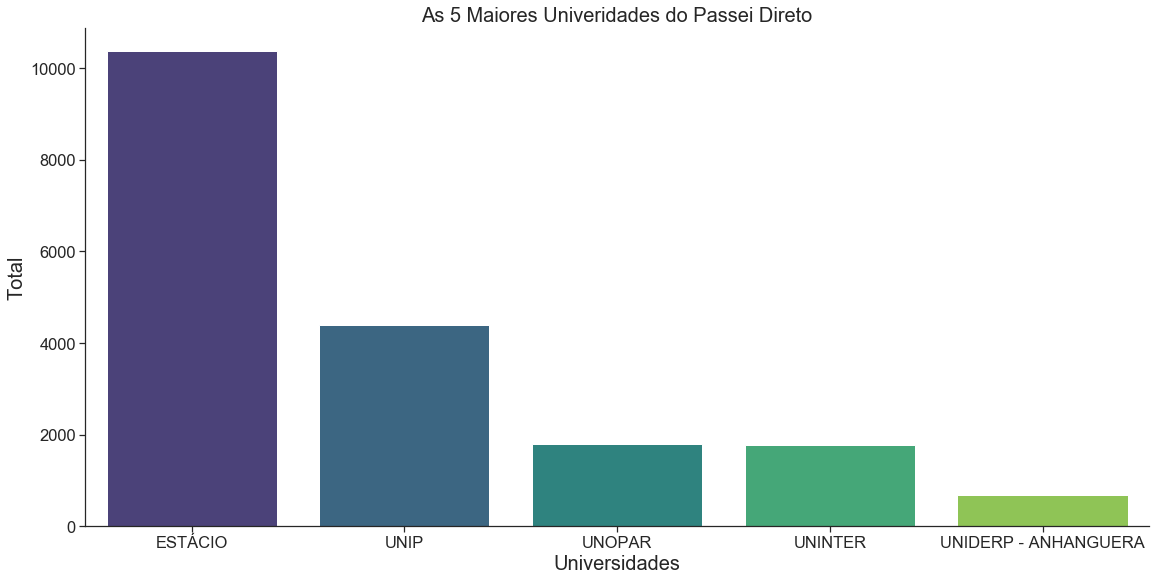

In [277]:
sns.set(style='ticks', font_scale=1.5, rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20})
sns.catplot(x='UniversityName', y='StudentId', 
            palette = "viridis",
            ci = None,
            data=dataset, 
            height=8.27, 
            aspect=20/10,
            legend=False,
            kind='bar')
plt.xlabel('Universidades')
plt.ylabel('Total')
plt.title('As 5 Maiores Univeridades do Passei Direto')
plt.show()

Por fim, já sabendo quais eram as nossas principais universidades, cortamos o nosso dataset para que fiquem apenas os registros provenientes dessas 5 universidades. Cruzamos com a base de fileViews para analisar os 5 principais arquivos de cada uma.

In [278]:
dataset = pd.merge(students, fileViews, how='outer', on='StudentId')
total_files = dataset.loc[(dataset['UniversityName'] == 'ESTÁCIO') | 
                  (dataset['UniversityName'] == 'UNIP') | 
                  (dataset['UniversityName'] == 'UNOPAR') | 
                  (dataset['UniversityName'] == 'UNINTER') | 
                  (dataset['UniversityName'] == 'UNIDERP - ANHANGUERA')]


total_files = total_files.groupby(['UniversityName'])['FileName'].value_counts().to_frame()
total_files = total_files.rename(columns={'FileName':'Total'})
total_files = total_files.reset_index()
total_files = total_files.groupby('UniversityName').apply(lambda x: x.nlargest(5, 'Total')).reset_index(drop=True)
total_files.head(25)

,UniversityName,FileName,Total
0,ESTÁCIO,AV1,1513
1,ESTÁCIO,AV2,1277
2,ESTÁCIO,Avaliando o aprendizado,1155
3,ESTÁCIO,BDQ Prova,1083
4,ESTÁCIO,Resumão Epidemiologia AV1 e AV2,1016
5,UNIDERP - ANHANGUERA,DESAFIO PROFISSIONAL,160
6,UNIDERP - ANHANGUERA,Desafio Profissional,78
7,UNIDERP - ANHANGUERA,PROJETO INTEGRADOR Faculdade anhanguera,75
8,UNIDERP - ANHANGUERA,Prointer I - Relatório Parcial,53
9,UNIDERP - ANHANGUERA,DESAFIO PROFISSIONAL 7 SEMESTRE PEDAGOGIA,52


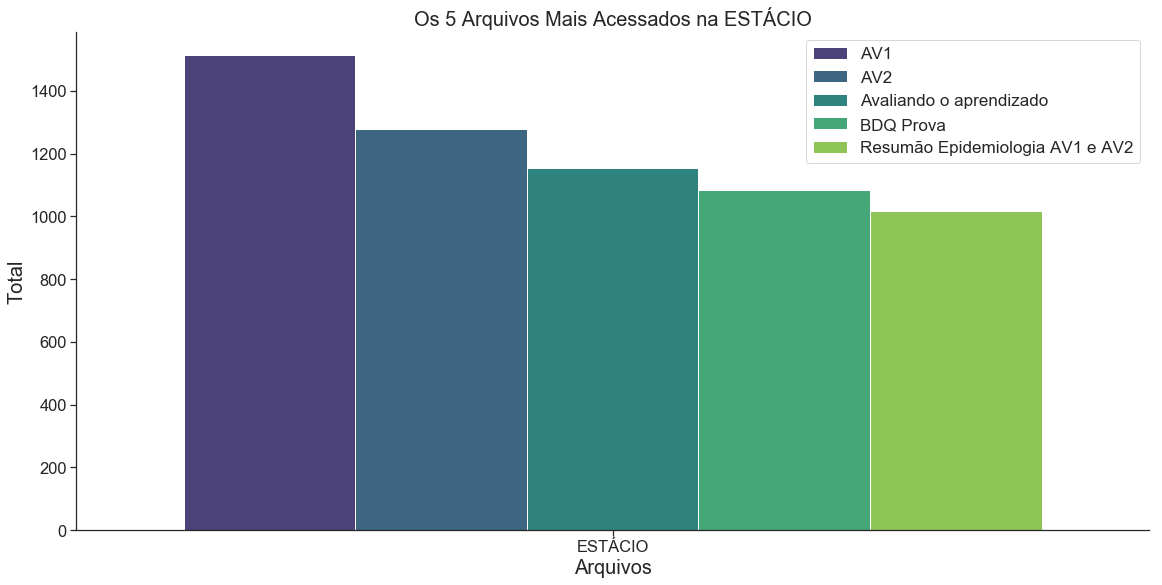

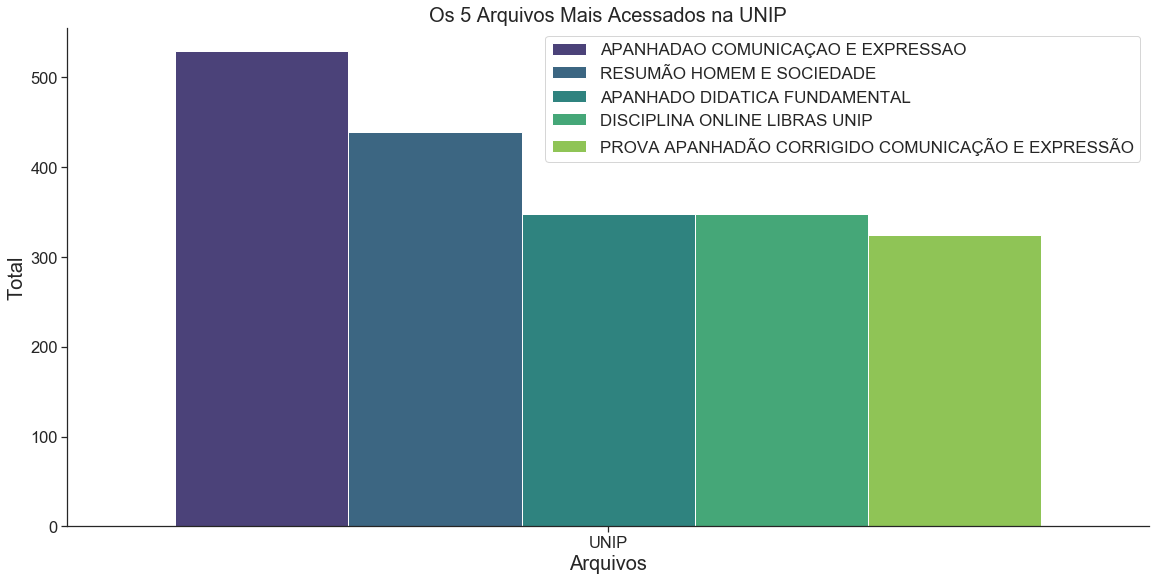

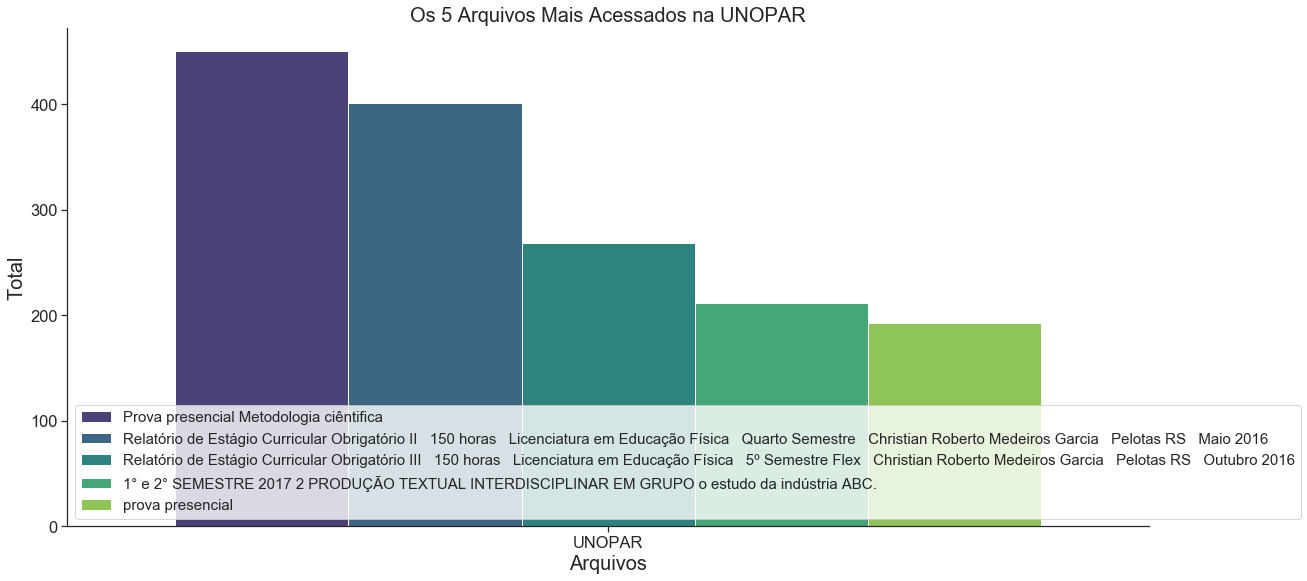

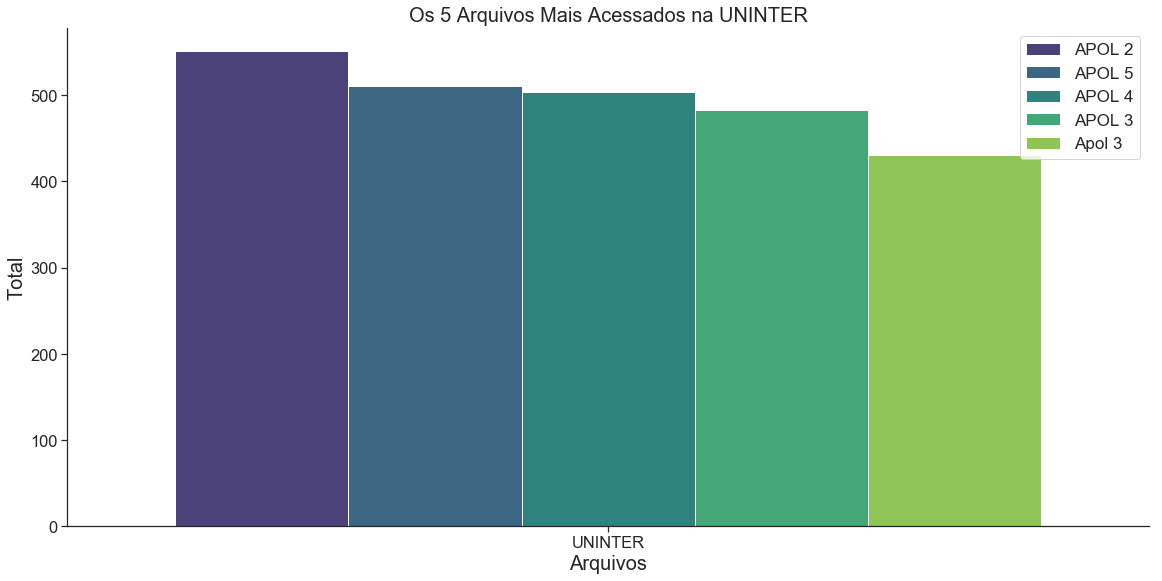

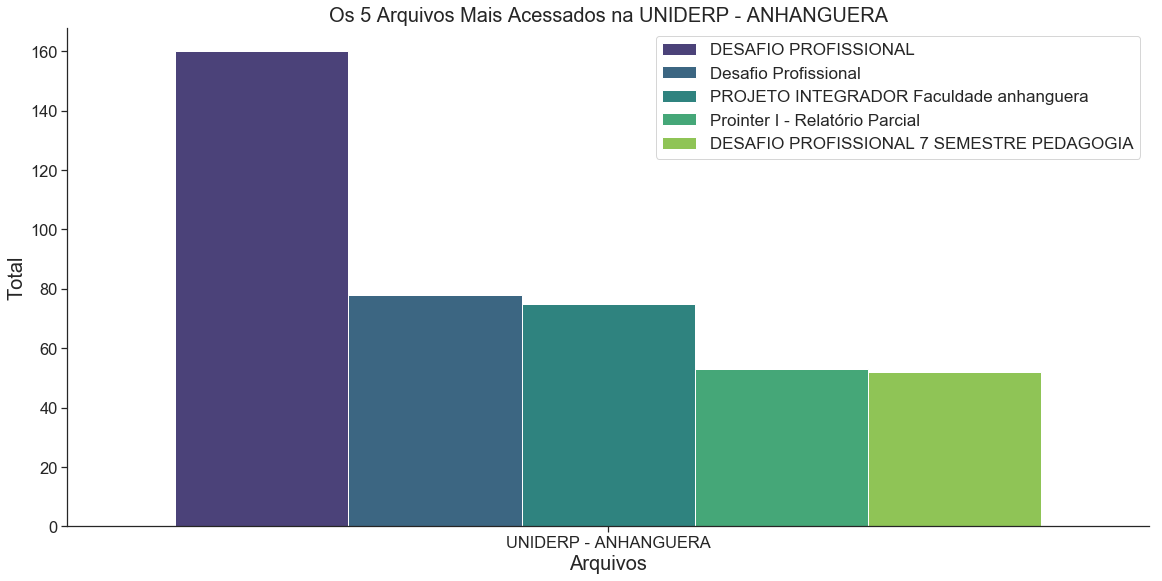

In [280]:
total_files_estacio = total_files.loc[total_files['UniversityName']=='ESTÁCIO']
sns.set(style='ticks', font_scale=1.5, rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20})
sns.catplot(x='UniversityName', y='Total', 
            hue='FileName',
            palette = "viridis",
            ci = None,
            data=total_files_estacio, 
            height=8.27, 
            aspect=20/10,
            legend=False,
            kind='bar')
plt.xlabel('Arquivos')
plt.ylabel('Total')
plt.title('Os 5 Arquivos Mais Acessados na ESTÁCIO')
plt.legend(fontsize=17)
print('')
total_files_unip = total_files.loc[total_files['UniversityName']=='UNIP']
sns.set(style='ticks', font_scale=1.5, rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20})
sns.catplot(x='UniversityName', y='Total', 
            hue='FileName',
            palette = "viridis",
            ci = None,
            data=total_files_unip, 
            height=8.27, 
            aspect=20/10,
            legend=False,
            kind='bar')
plt.xlabel('Arquivos')
plt.ylabel('Total')
plt.title('Os 5 Arquivos Mais Acessados na UNIP')
plt.legend(fontsize=17)
print('')
total_files_unopar = total_files.loc[total_files['UniversityName']=='UNOPAR']
sns.set(style='ticks', font_scale=1.5, rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20})
sns.catplot(x='UniversityName', y='Total', 
            hue='FileName',
            palette = "viridis",
            ci = None,
            data=total_files_unopar, 
            height=8.27, 
            aspect=20/10,
            legend=False,
            kind='bar')
plt.xlabel('Arquivos')
plt.ylabel('Total')
plt.title('Os 5 Arquivos Mais Acessados na UNOPAR')
plt.legend(loc='lower left', fontsize=15)
print('')
total_files_uninter = total_files.loc[total_files['UniversityName']=='UNINTER']
sns.set(style='ticks', font_scale=1.5, rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20})
sns.catplot(x='UniversityName', y='Total', 
            hue='FileName',
            palette = "viridis",
            ci = None,
            data=total_files_uninter, 
            height=8.27, 
            aspect=20/10,
            legend=False,
            kind='bar')
plt.xlabel('Arquivos')
plt.ylabel('Total')
plt.title('Os 5 Arquivos Mais Acessados na UNINTER')
plt.legend(fontsize=17)
print('')
total_files_ead = total_files.loc[total_files['UniversityName']=='UNIDERP - ANHANGUERA']
sns.set(style='ticks', font_scale=1.5, rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20})
sns.catplot(x='UniversityName', y='Total', 
            hue='FileName',
            palette = "viridis",
            ci = None,
            data=total_files_ead, 
            height=8.27, 
            aspect=20/10,
            legend=False,
            kind='bar')
plt.xlabel('Arquivos')
plt.ylabel('Total')
plt.title('Os 5 Arquivos Mais Acessados na UNIDERP - ANHANGUERA')
plt.legend(fontsize=17)
plt.show()

Muito Obrigado pela oportunidade! :D